In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
dataset = pd.read_csv('/content/predictive_maintenance.csv')

In [5]:
dataset.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [6]:
dataset['Target'].value_counts()

Target
0    9661
1     339
Name: count, dtype: int64

In [7]:
dataset.describe().transpose()

count        mean          std     min      25%  \
UDI                      10000.0  5000.50000  2886.895680     1.0  2500.75   
Air temperature [K]      10000.0   300.00493     2.000259   295.3   298.30   
Process temperature [K]  10000.0   310.00556     1.483734   305.7   308.80   
Rotational speed [rpm]   10000.0  1538.77610   179.284096  1168.0  1423.00   
Torque [Nm]              10000.0    39.98691     9.968934     3.8    33.20   
Tool wear [min]          10000.0   107.95100    63.654147     0.0    53.00   
Target                   10000.0     0.03390     0.180981     0.0     0.00   

                            50%      75%      max  
UDI                      5000.5  7500.25  10000.0  
Air temperature [K]       300.1   301.50    304.5  
Process temperature [K]   310.1   311.10    313.8  
Rotational speed [rpm]   1503.0  1612.00   2886.0  
Torque [Nm]                40.1    46.80     76.6  
Tool wear [min]           108.0   162.00    253.0  
Target                      0.0     0.00      1.0

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [9]:
dataset.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
dataset['Type'] = label_encoder.fit_transform(dataset['Type'])
dataset['Failure Type'] = label_encoder.fit_transform(dataset['Failure Type'])

In [11]:
dataset.drop(['UDI', 'Product ID'], axis=1, inplace=True)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataset[['Air temperature [K]', 'Process temperature [k]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']] = scaler.fit_transform(
    dataset[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
)

In [13]:
print(dataset['Target'].value_counts())

Target
0    9661
1     339
Name: count, dtype: int64


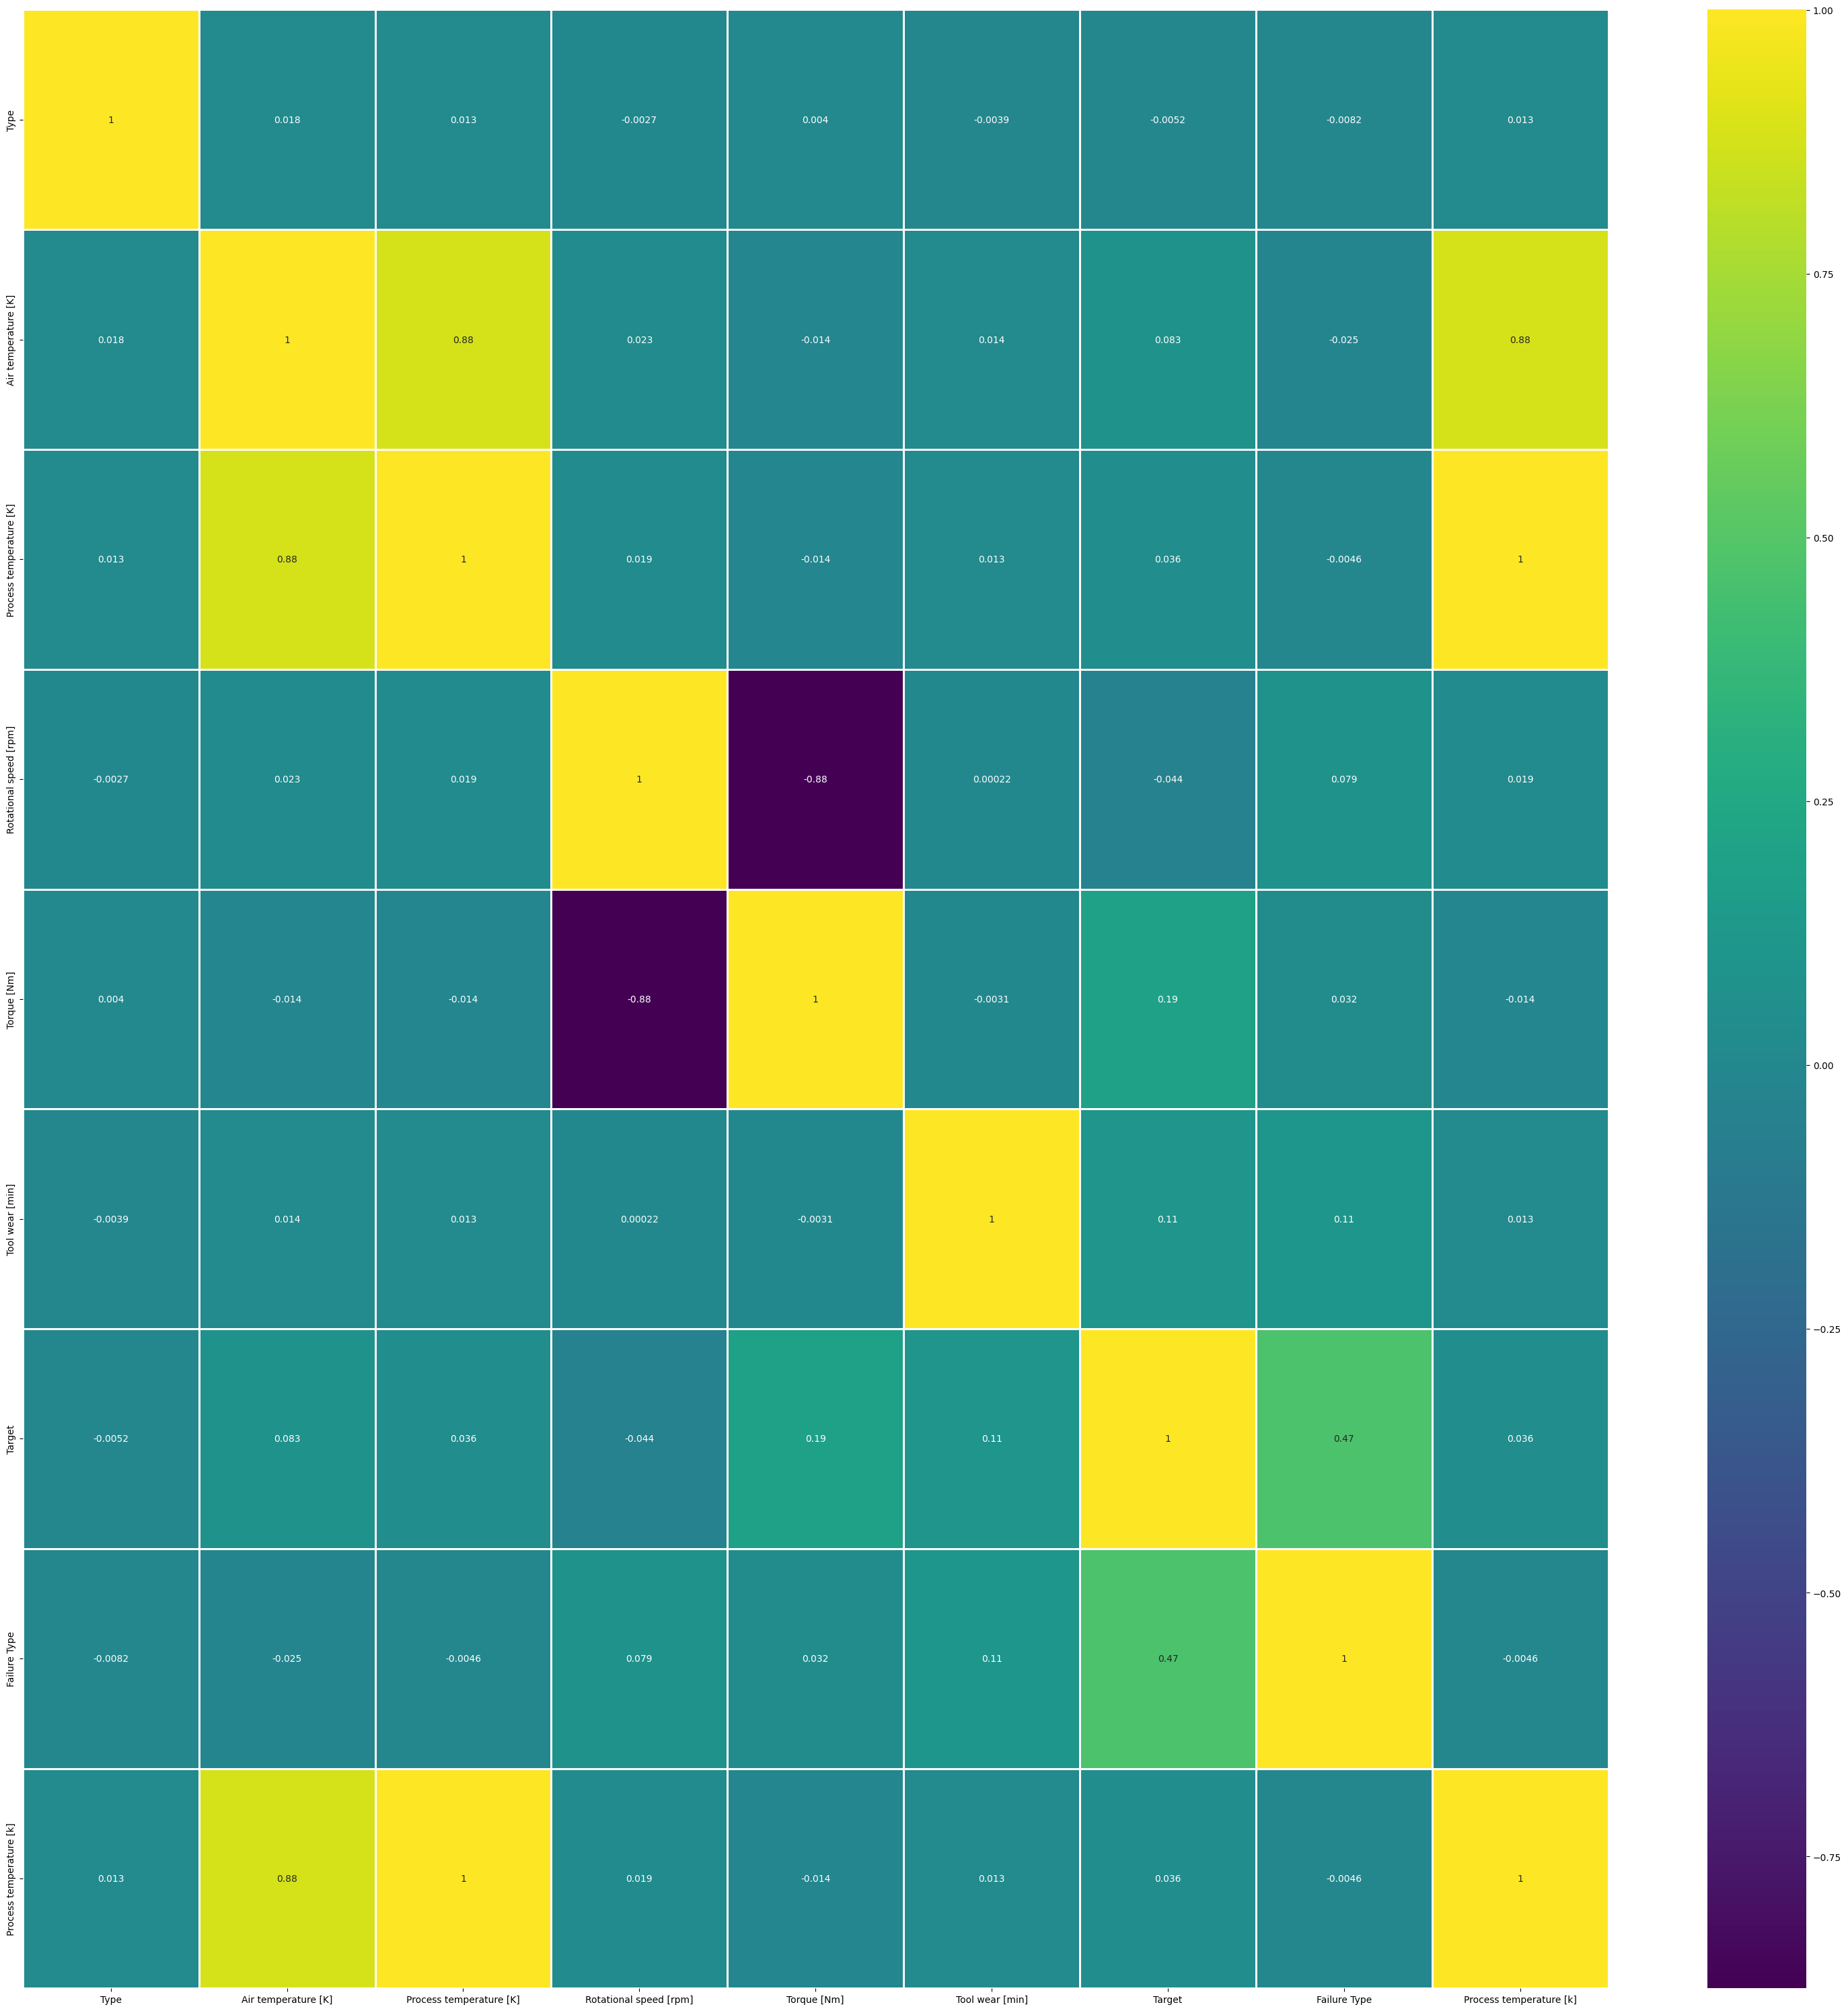

In [14]:
corr = dataset.corr()
plt.figure(figsize=(30,30))
sns.heatmap(corr,annot=True, linewidths=2, cmap='viridis')
plt.tight_layout()

In [15]:
corr.sort_index(ascending=True)

Type  Air temperature [K]  \
Air temperature [K]      0.017599             1.000000   
Failure Type            -0.008249            -0.025327   
Process temperature [K]  0.013444             0.876107   
Process temperature [k]  0.013444             0.876107   
Rotational speed [rpm]  -0.002693             0.022670   
Target                  -0.005152             0.082556   
Tool wear [min]         -0.003930             0.013853   
Torque [Nm]              0.004011            -0.013778   
Type                     1.000000             0.017599   

                         Process temperature [K]  Rotational speed [rpm]  \
Air temperature [K]                     0.876107                0.022670   
Failure Type                           -0.004600                0.079407   
Process temperature [K]                 1.000000                0.019277   
Process temperature [k]                 1.000000                0.019277   
Rotational speed [rpm]                  0.019277                1.000000   
Target                                  0.035946               -0.044188   
Tool wear [min]                         0.013488                0.000223   
Torque [Nm]                            -0.014061               -0.875027   
Type                                    0.013444               -0.002693   

                         Torque [Nm]  Tool wear [min]    Target  Failure Type  \
Air temperature [K]        -0.013778         0.013853  0.082556     -0.025327   
Failure Type                0.031737         0.111619  0.470541      1.000000   
Process temperature [K]    -0.014061         0.013488  0.035946     -0.004600   
Process temperature [k]    -0.014061         0.013488  0.035946     -0.004600   
Rotational speed [rpm]     -0.875027         0.000223 -0.044188      0.079407   
Target                      0.191321         0.105448  1.000000      0.470541   
Tool wear [min]            -0.003093         1.000000  0.105448      0.111619   
Torque [Nm]                 1.000000        -0.003093  0.191321      0.031737   
Type                        0.004011        -0.003930 -0.005152     -0.008249   

                         Process temperature [k]  
Air temperature [K]                     0.876107  
Failure Type                           -0.004600  
Process temperature [K]                 1.000000  
Process temperature [k]                 1.000000  
Rotational speed [rpm]                  0.019277  
Target                                  0.035946  
Tool wear [min]                         0.013488  
Torque [Nm]                            -0.014061  
Type                                    0.013444

## Data Visualization

---



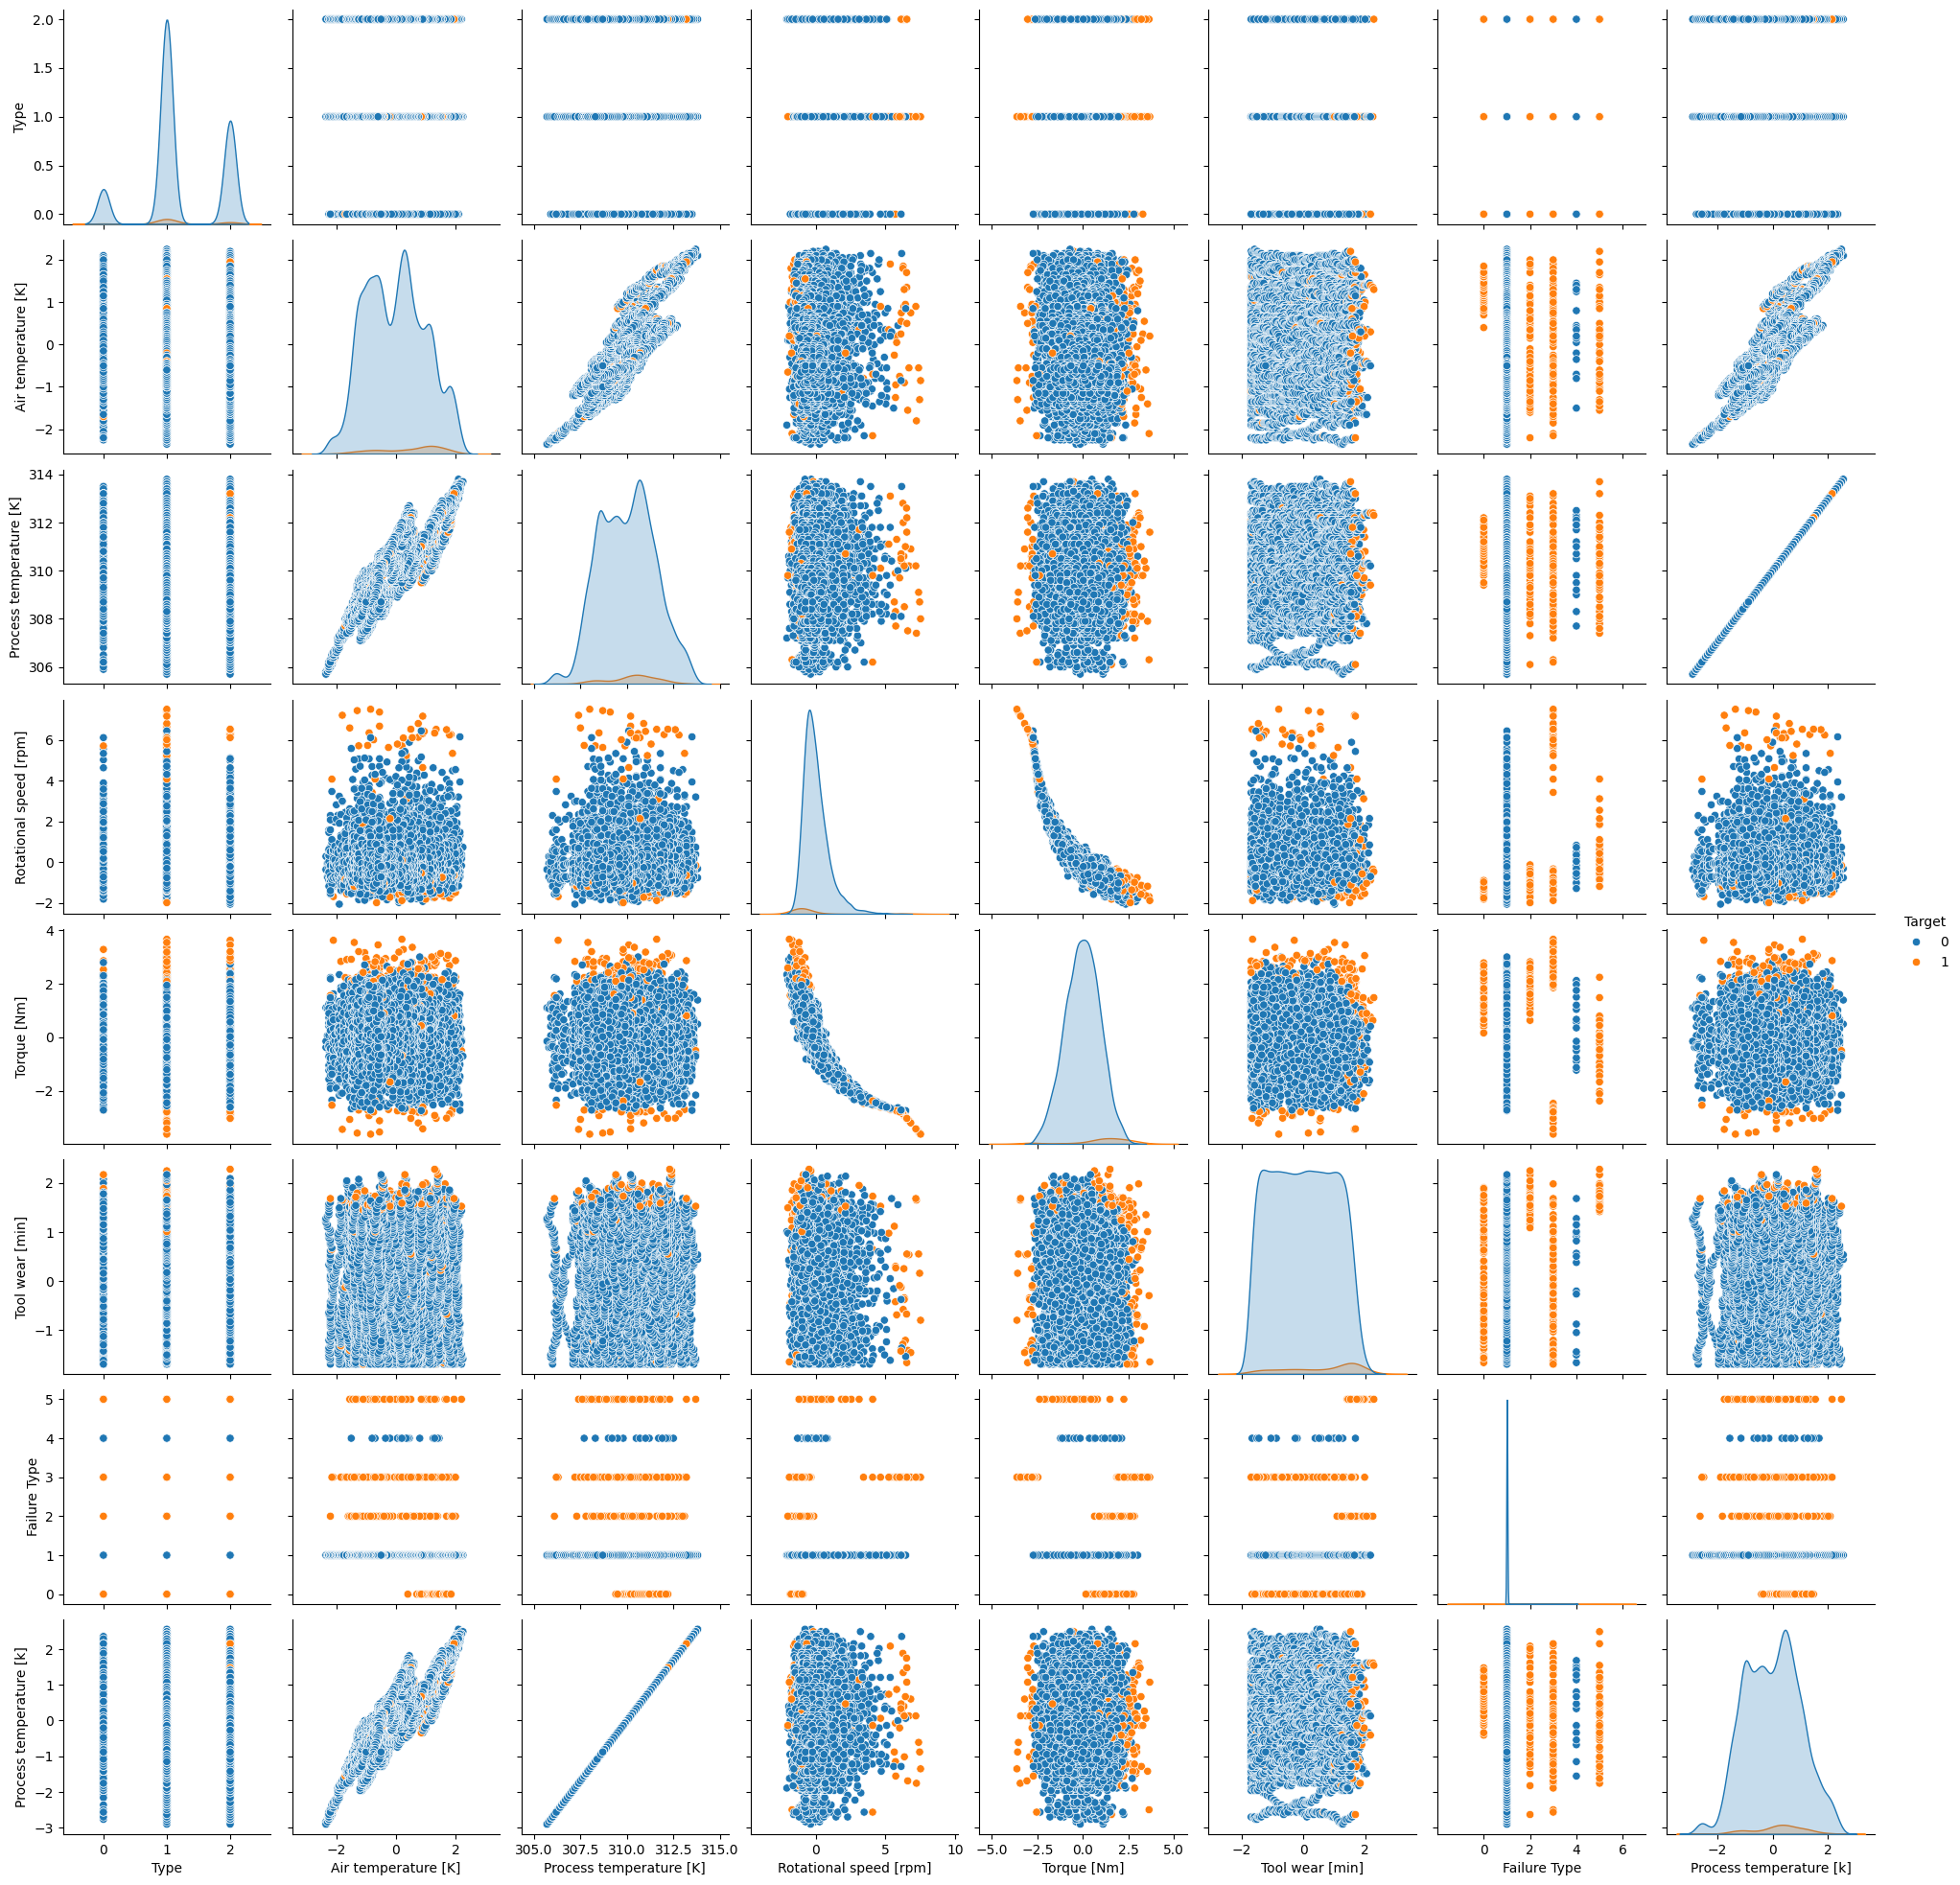

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(dataset, hue="Target", diag_kind="kde")
plt.show()

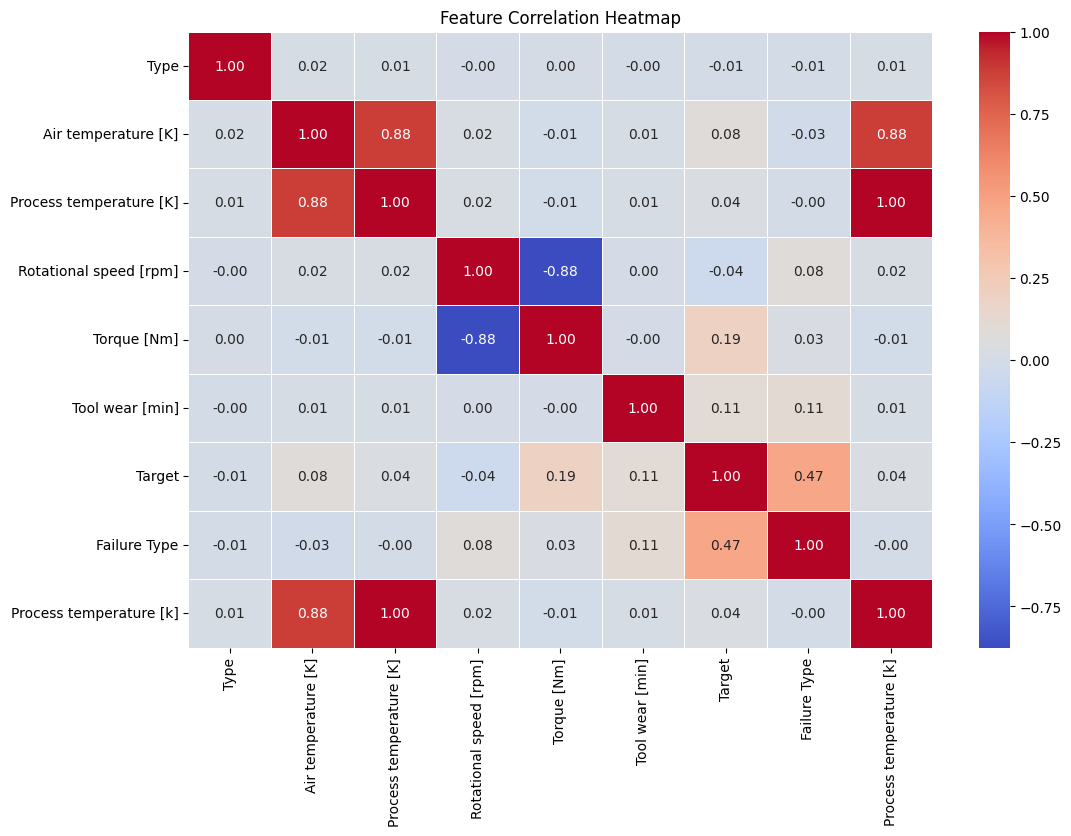

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

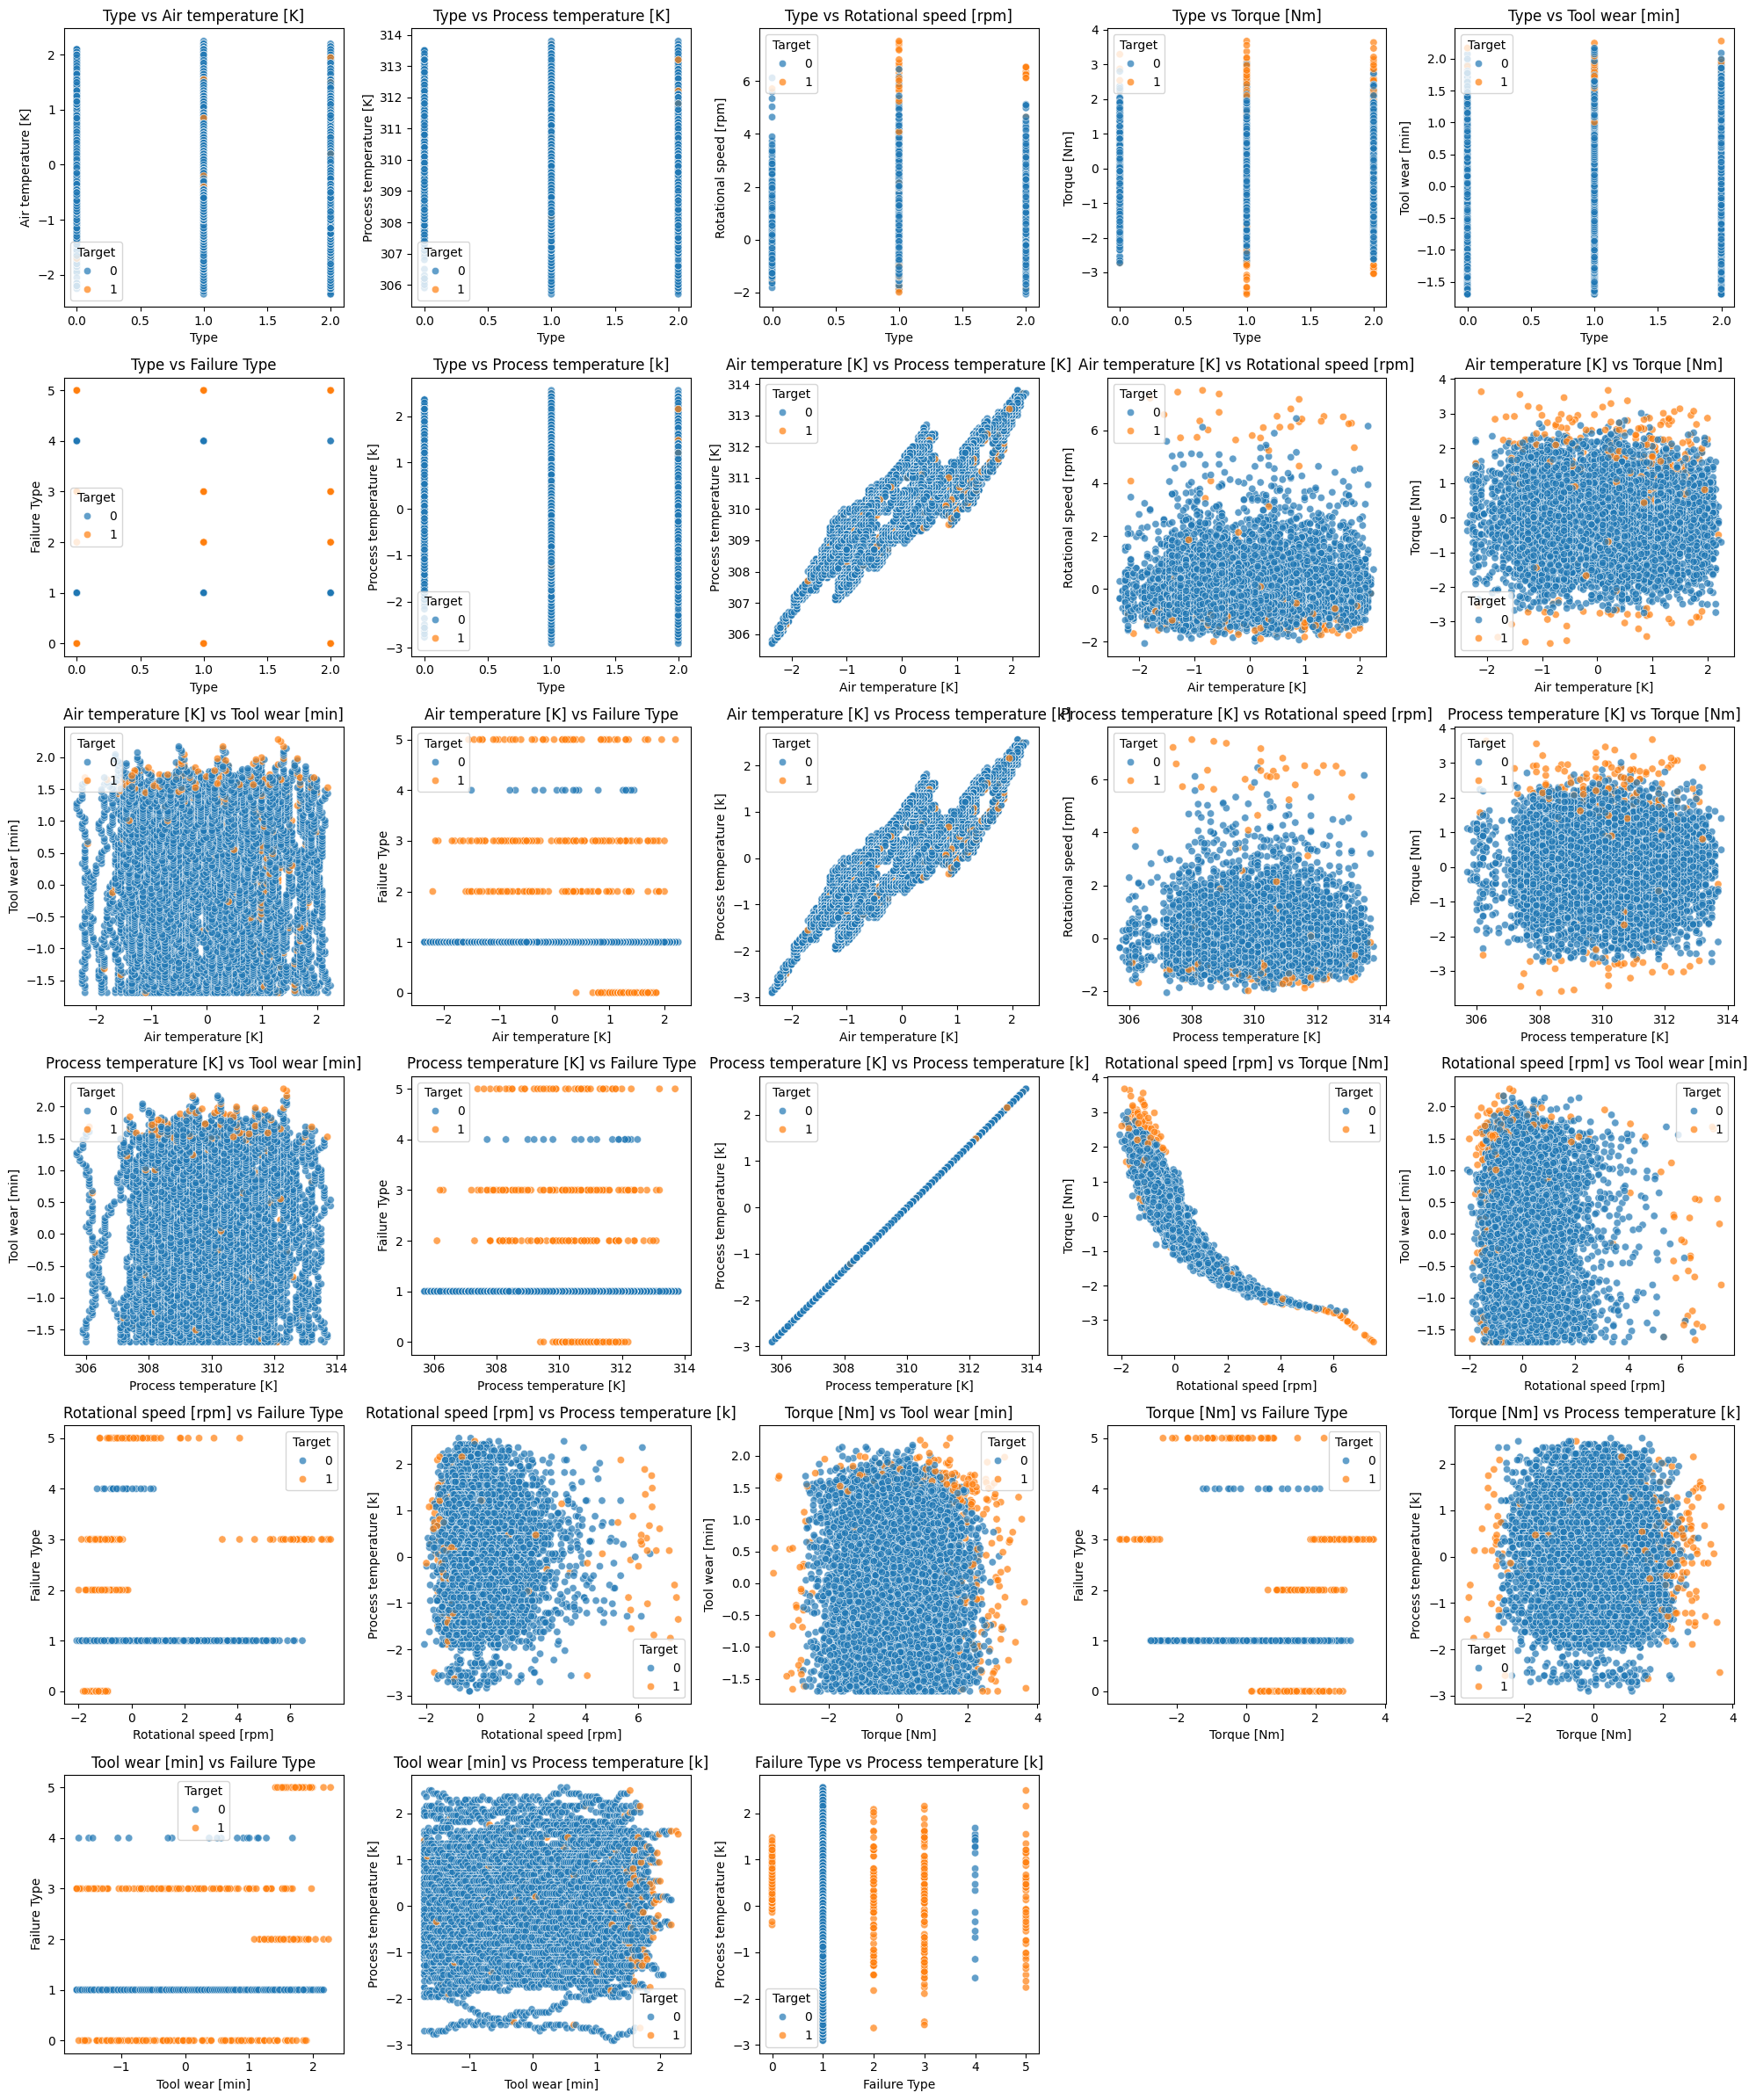

In [18]:
import itertools

dataset['Target'] = dataset['Target'].astype(str)

# Select numerical columns
num_cols = dataset.select_dtypes(include=['float64', 'int64']).columns

# Calculate the number of combinations
n_combinations = len(list(itertools.combinations(num_cols, 2)))

# Dynamically determine grid size
n_rows = int(np.ceil(np.sqrt(n_combinations)))
n_cols = int(np.ceil(n_combinations / n_rows))

# Create figure
plt.figure(figsize=(n_cols * 4, n_rows * 4))

# Plot scatterplots
for i, (col1, col2) in enumerate(itertools.combinations(num_cols, 2), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.scatterplot(data=dataset, x=col1, y=col2, hue="Target", alpha=0.7)
    plt.title(f"{col1} vs {col2}")

plt.tight_layout()
plt.show()


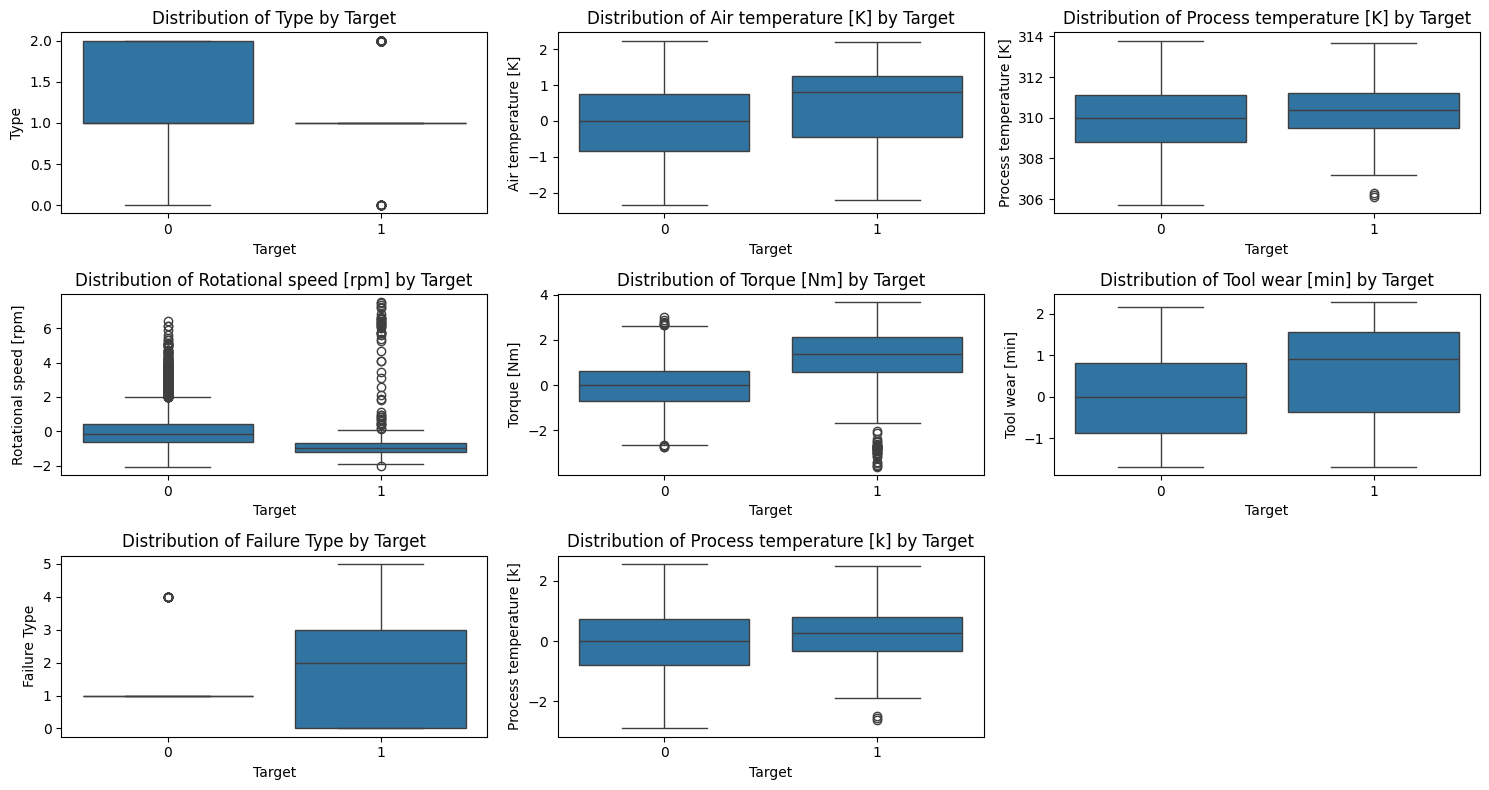

In [19]:
dataset.columns = dataset.columns.str.strip()
dataset['Target']=dataset['Target'].astype(str)

plt.figure(figsize=(15,8))
for i, col in enumerate(dataset.select_dtypes(include=['float64', 'int64']).columns, 1):
    plt.subplot(3,3,i)
    sns.boxplot(data=dataset, x= "Target", y=col)
    plt.title(f"Distribution of {col} by Target")

plt.tight_layout()
plt.show()

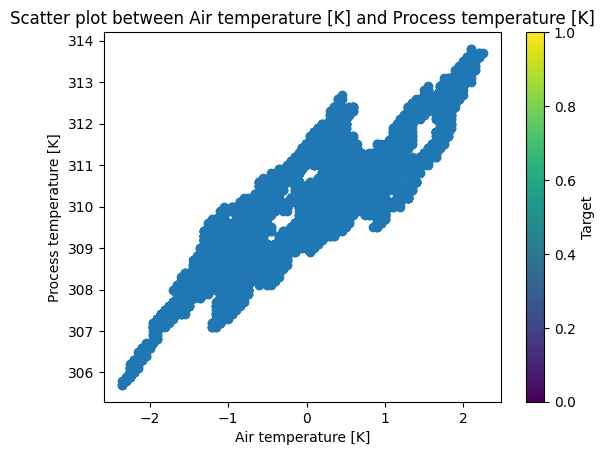

In [20]:
plt.scatter(dataset['Air temperature [K]'], dataset['Process temperature [K]'])
plt.title('Scatter plot between Air temperature [K] and Process temperature [K]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Process temperature [K]')
plt.colorbar(label='Target')
plt.show()

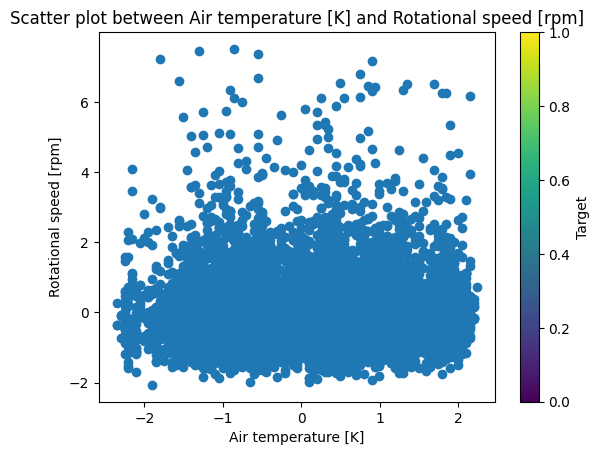

In [21]:
plt.scatter(dataset['Air temperature [K]'], dataset['Rotational speed [rpm]'])
plt.title('Scatter plot between Air temperature [K] and Rotational speed [rpm]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Rotational speed [rpm]')
plt.colorbar(label='Target')
plt.show()

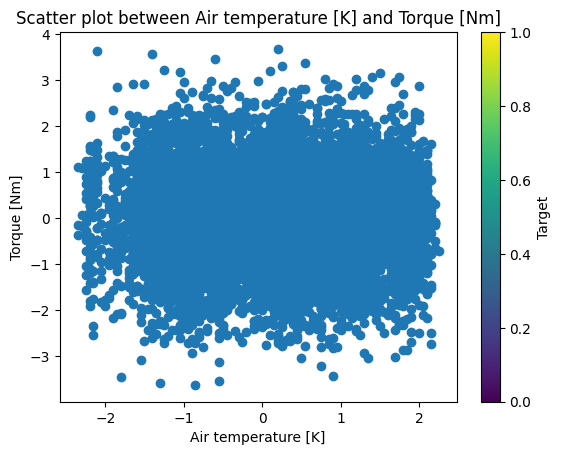

In [22]:
plt.scatter(dataset['Air temperature [K]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Air temperature [K] and Torque [Nm]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

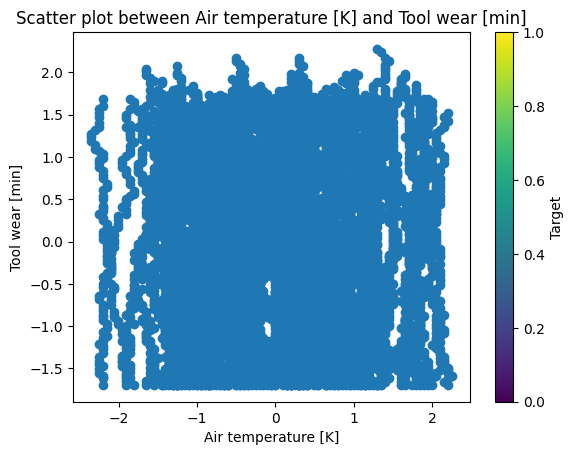

In [23]:
plt.scatter(dataset['Air temperature [K]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Air temperature [K] and Tool wear [min]')
plt.xlabel('Air temperature [K]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

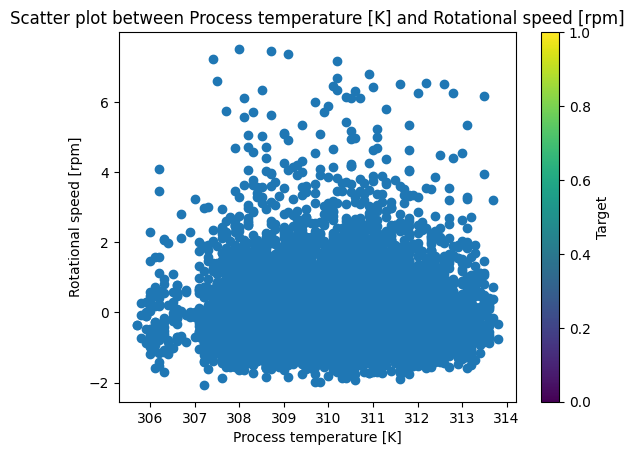

In [24]:
plt.scatter(dataset['Process temperature [K]'], dataset['Rotational speed [rpm]'])
plt.title('Scatter plot between Process temperature [K] and Rotational speed [rpm]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Rotational speed [rpm]')
plt.colorbar(label='Target')
plt.show()

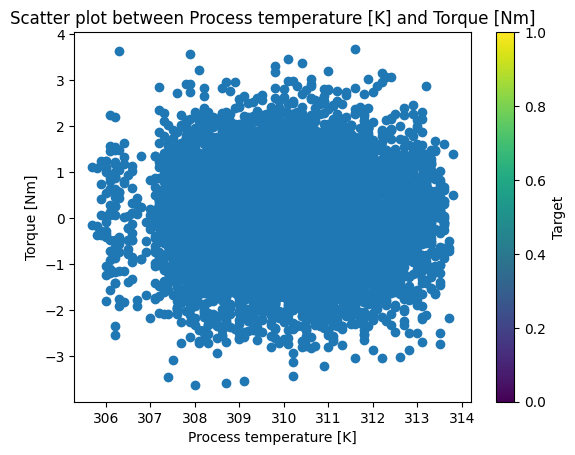

In [25]:
plt.scatter(dataset['Process temperature [K]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Process temperature [K] and Torque [Nm]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

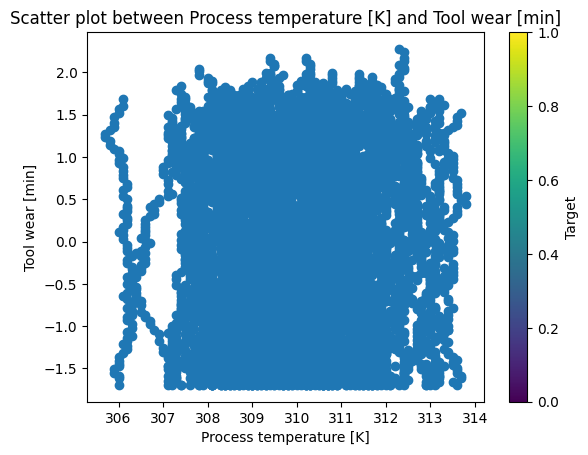

In [26]:
plt.scatter(dataset['Process temperature [K]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Process temperature [K] and Tool wear [min]')
plt.xlabel('Process temperature [K]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

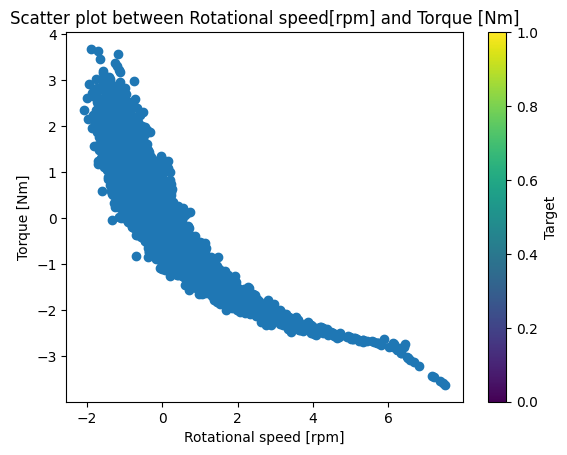

In [27]:
plt.scatter(dataset['Rotational speed [rpm]'], dataset['Torque [Nm]'])
plt.title('Scatter plot between Rotational speed[rpm] and Torque [Nm]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.colorbar(label='Target')
plt.show()

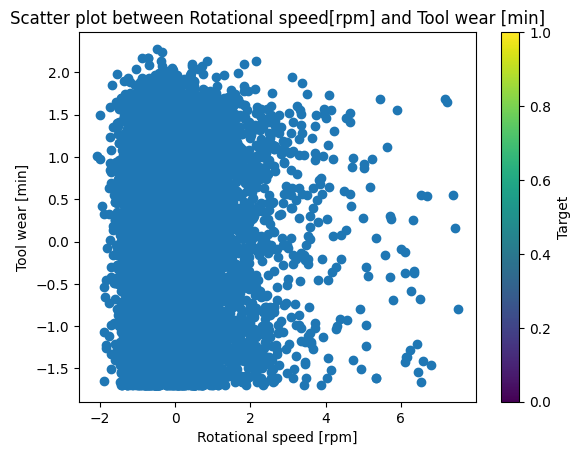

In [28]:
plt.scatter(dataset['Rotational speed [rpm]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Rotational speed[rpm] and Tool wear [min]')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

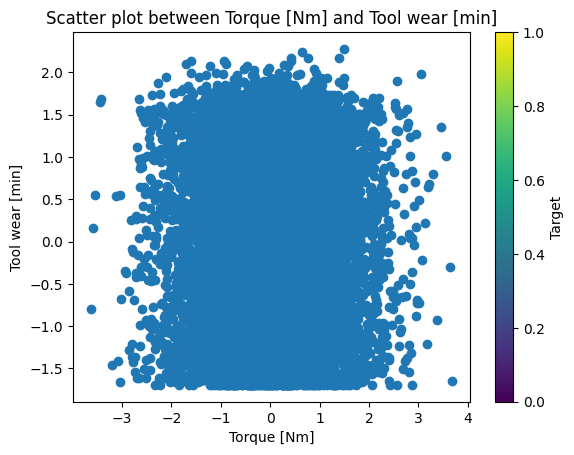

In [29]:
plt.scatter(dataset['Torque [Nm]'], dataset['Tool wear [min]'])
plt.title('Scatter plot between Torque [Nm] and Tool wear [min]')
plt.xlabel('Torque [Nm]')
plt.ylabel('Tool wear [min]')
plt.colorbar(label='Target')
plt.show()

<Axes: xlabel='Target'>

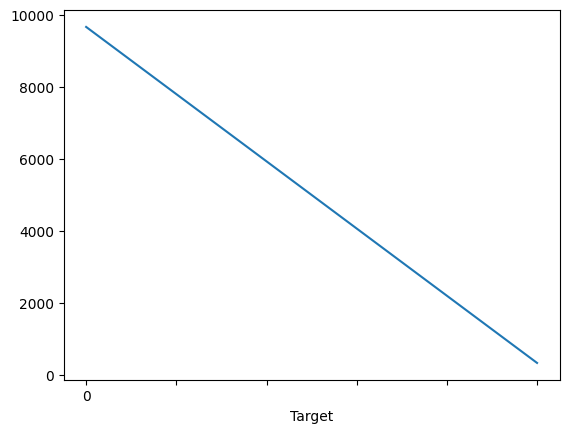

In [30]:
dataset['Target'].value_counts().plot()

<ipython-input-31-00bfe1aaf141>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=dataset['Target'], palette='bright')


<Axes: xlabel='Target', ylabel='count'>

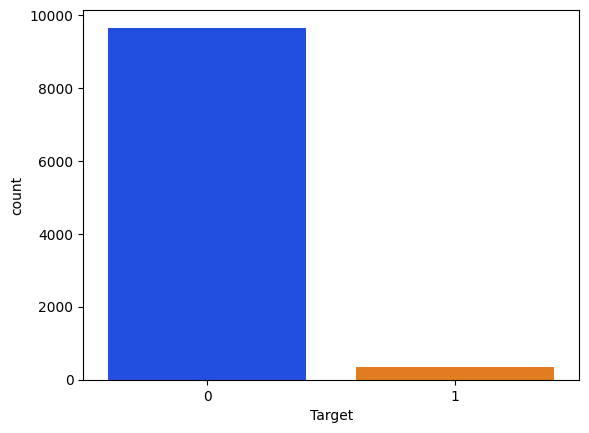

In [31]:
sns.countplot(x=dataset['Target'], palette='bright')

## Feature Selection

---



In [32]:
dataset.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                    308.6                0.068185   
1     1            -0.902393                    308.7               -0.729472   
2     1            -0.952389                    308.5               -0.227450   
3     1            -0.902393                    308.6               -0.590021   
4     1            -0.902393                    308.7               -0.729472   

   Torque [Nm]  Tool wear [min] Target  Failure Type  Process temperature [k]  
0     0.282200        -1.695984      0             1                -0.947360  
1     0.633308        -1.648852      0             1                -0.879959  
2     0.944290        -1.617430      0             1                -1.014761  
3    -0.048845        -1.586009      0             1                -0.947360  
4     0.001313        -1.554588      0             1                -0.879959

In [33]:
dataset.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Target',
       'Failure Type', 'Process temperature [k]'],
      dtype='object')

In [34]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
dataset['Failure Type'] = encoder.fit_transform(dataset['Failure Type'])

print(dataset['Failure Type'].value_counts())

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64


In [35]:
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

In [36]:
print(numeric_df.columns)

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type', 'Process temperature [k]'],
      dtype='object')


In [37]:
dataset['Target'] = dataset['Target'].astype('category').cat.codes
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

In [38]:
dataset['Target'] = dataset['Target'].astype('float64')  # or appropriate type
numeric_df = dataset.select_dtypes(include=['float64', 'int64'])

# Calculate correlation with Target
correlation_with_target = numeric_df.corr()['Target'].sort_values(ascending=False)
print(correlation_with_target)

Target                     1.000000
Failure Type               0.470541
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [k]    0.035946
Process temperature [K]    0.035946
Type                      -0.005152
Rotational speed [rpm]    -0.044188
Name: Target, dtype: float64


In [39]:
print(correlation_with_target)

Target                     1.000000
Failure Type               0.470541
Torque [Nm]                0.191321
Tool wear [min]            0.105448
Air temperature [K]        0.082556
Process temperature [k]    0.035946
Process temperature [K]    0.035946
Type                      -0.005152
Rotational speed [rpm]    -0.044188
Name: Target, dtype: float64


<ipython-input-40-8fa6b81a83ec>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')


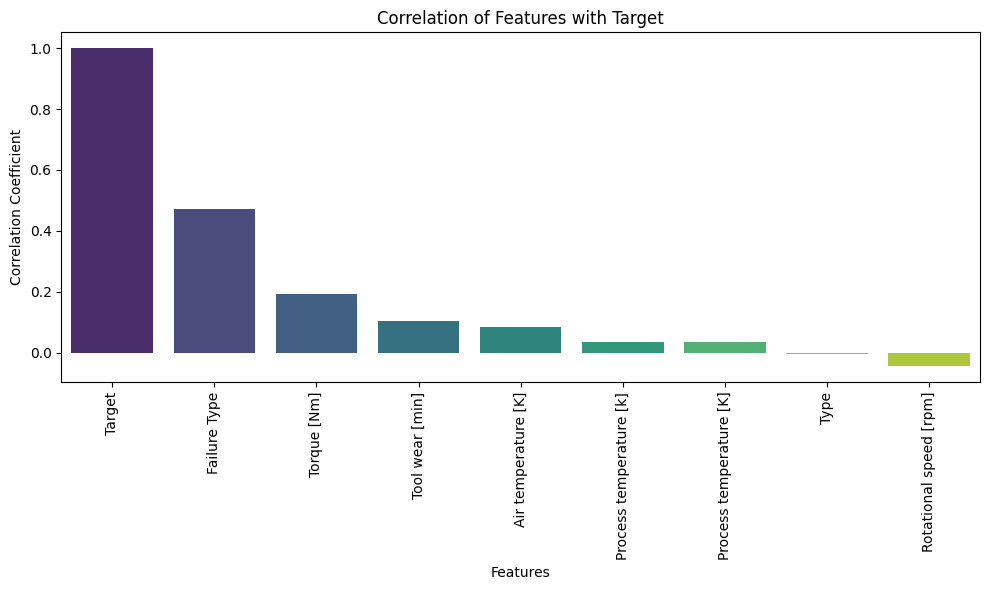

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='viridis')
plt.xticks(rotation=90)
plt.title(f"Correlation of Features with Target")
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [41]:
columns_to_drop = ['Failure Type']

In [42]:
dataset = dataset.drop(columns=columns_to_drop)

In [43]:
dataset.head()

Type  Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
0     2            -0.952389                    308.6                0.068185   
1     1            -0.902393                    308.7               -0.729472   
2     1            -0.952389                    308.5               -0.227450   
3     1            -0.902393                    308.6               -0.590021   
4     1            -0.902393                    308.7               -0.729472   

   Torque [Nm]  Tool wear [min]  Target  Process temperature [k]  
0     0.282200        -1.695984     0.0                -0.947360  
1     0.633308        -1.648852     0.0                -0.879959  
2     0.944290        -1.617430     0.0                -1.014761  
3    -0.048845        -1.586009     0.0                -0.947360  
4     0.001313        -1.554588     0.0                -0.879959

In [44]:
columns_to_drop = ['Process temperature [K]']
data = dataset.drop(columns=columns_to_drop)

In [45]:
data.columns

Index(['Type', 'Air temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Process temperature [k]'],
      dtype='object')

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  int64  
 1   Air temperature [K]      10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  float64
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  float64
 5   Target                   10000 non-null  float64
 6   Process temperature [k]  10000 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 547.0 KB


## Data Normalization

---



In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
X=data.drop('Target', axis=1)
y=data['Target']

In [49]:
scaler=StandardScaler()

In [50]:
X_scaled=scaler.fit_transform(X)

In [51]:
X_scaled

array([[ 1.33388944, -0.95238944,  0.06818514,  0.28219976, -1.69598374,
        -0.94735989],
       [-0.33222278, -0.90239341, -0.72947151,  0.63330802, -1.6488517 ,
        -0.879959  ],
       [-0.33222278, -0.95238944, -0.22744984,  0.94428963, -1.61743034,
        -1.01476077],
       ...,
       [ 1.33388944, -0.50242514,  0.59251888, -0.66077672, -1.35034876,
        -0.94735989],
       [-1.998335  , -0.50242514, -0.72947151,  0.85400464, -1.30321671,
        -0.879959  ],
       [ 1.33388944, -0.50242514, -0.2162938 ,  0.02137647, -1.22466331,
        -0.879959  ]])

In [52]:
y

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
9995    0.0
9996    0.0
9997    0.0
9998    0.0
9999    0.0
Name: Target, Length: 10000, dtype: float64

# Model Train "Target" as a Target Column

## Train Test Split

---



In [53]:
from sklearn.model_selection import train_test_split

In [54]:
data['Target'].value_counts()

Target
0.0    9661
1.0     339
Name: count, dtype: int64

In [55]:
print(pd.Series(y).value_counts())

Target
0.0    9661
1.0     339
Name: count, dtype: int64


Text(0, 0.5, 'Count')

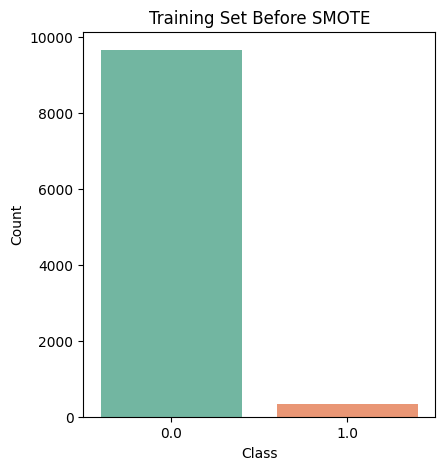

In [56]:
# Plot class distribution before SMOTE
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(x=pd.Series(y), hue=pd.Series(y), palette='Set2', legend=False)
plt.title('Training Set Before SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

In [57]:
from imblearn.over_sampling import SMOTE

In [58]:
# Apply SMOTE to training set
smote = SMOTE(sampling_strategy={0: 9661, 1: 9661}, random_state=42)  # Match class 0's count in training set
X_smote, y_smote = smote.fit_resample(X_scaled, y)

In [59]:
print(pd.Series(y_smote).value_counts())

Target
0.0    9661
1.0    9661
Name: count, dtype: int64


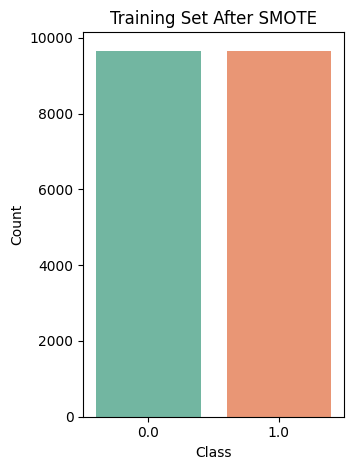

In [60]:
# Plot class distribution after SMOTE
plt.subplot(1, 2, 2)
sns.countplot(x=pd.Series(y_smote), hue=pd.Series(y_smote), palette='Set2', legend=False)
plt.title('Training Set After SMOTE')
plt.xlabel('Class')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42, stratify=y_smote)

## Implement Ensemble Models

---



In [62]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize

In [63]:
from sklearn.metrics import classification_report, roc_auc_score

def evaluate_multiclass(y_true, y_pred, y_proba):
    # Ensure y_true is 1D
    if y_true.ndim > 1:
        y_true = y_true.argmax(axis=1)  # Convert binarized labels back to 1D if needed
        print("Converted y_true to 1D with shape:", y_true.shape)

    # Generate classification report
    report = classification_report(y_true, y_pred, output_dict=True)

    # Calculate ROC AUC
    num_classes = len(set(y_true))
    if num_classes == 2:
        # Binary classification: use positive class probabilities
        roc_auc = roc_auc_score(y_true, y_proba[:, 1])
    else:
        # Multi-class: use one-vs-rest
        roc_auc = roc_auc_score(y_true, y_proba, multi_class="ovr")

    # Compile metrics
    metrics = {
        "Accuracy": report['accuracy'],
        "Precision (Macro)": report['macro avg']['precision'],
        "Recall (Macro)": report['macro avg']['recall'],
        "F1 Score (Macro)": report['macro avg']['f1-score'],
        "ROC AUC Score": roc_auc
    }
    return metrics

### Bagging

In [64]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

### **Random Forest**

In [65]:
forest_model = RandomForestClassifier(random_state=42)

In [66]:
forest_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [67]:
forest_pred = forest_model.predict(X_test)

In [68]:
print(classification_report(y_test, forest_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98      2899
         1.0       0.97      0.99      0.98      2898

    accuracy                           0.98      5797
   macro avg       0.98      0.98      0.98      5797
weighted avg       0.98      0.98      0.98      5797



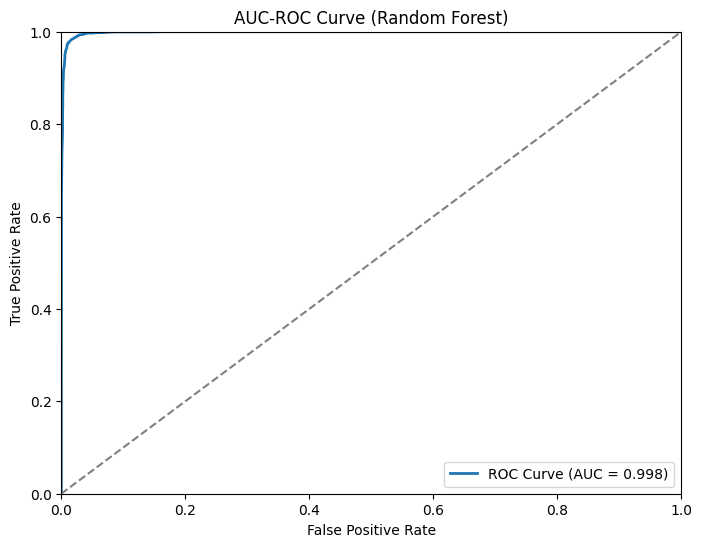

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = forest_model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [70]:
classes = np.unique(y_test)

In [71]:
RF_accuracy = accuracy_score(y_test, forest_pred)
RF_precision = precision_score(y_test, forest_pred, average='weighted')
RF_recall = recall_score(y_test, forest_pred, average='weighted')
RF_f1 = f1_score(y_test, forest_pred, average='weighted')

In [74]:
forest_pred_proba = forest_model.predict_proba(X_test)[:, 1]
RF_roc_auc = roc_auc_score(y_test, forest_pred_proba)

In [75]:
# Print Metrics
print(f"Accuracy: {RF_accuracy:.4f}")
print(f"Precision: {RF_precision:.4f}")
print(f"Recall: {RF_recall:.4f}")
print(f"F1 Score: {RF_f1:.4f}")
print(f"ROC AUC Score: {RF_roc_auc:.4f}")

Accuracy: 0.9795
Precision: 0.9796
Recall: 0.9795
F1 Score: 0.9795
ROC AUC Score: 0.9985


Text(70.72222222222221, 0.5, 'True')

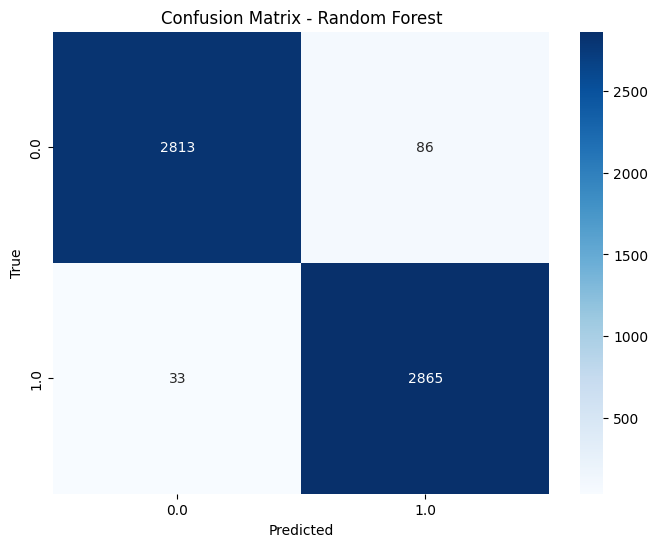

In [78]:
# 2. Confusion Matrix Graph
cm = confusion_matrix(y_test, forest_pred, labels=classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')

In [79]:
# 2. Confusion Matrix Graph
cm = confusion_matrix(y_test, forest_pred, labels=classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title(f'Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.savefig(f'confusion_matrix_Random Forest.png', dpi=300, bbox_inches='tight')
plt.close()

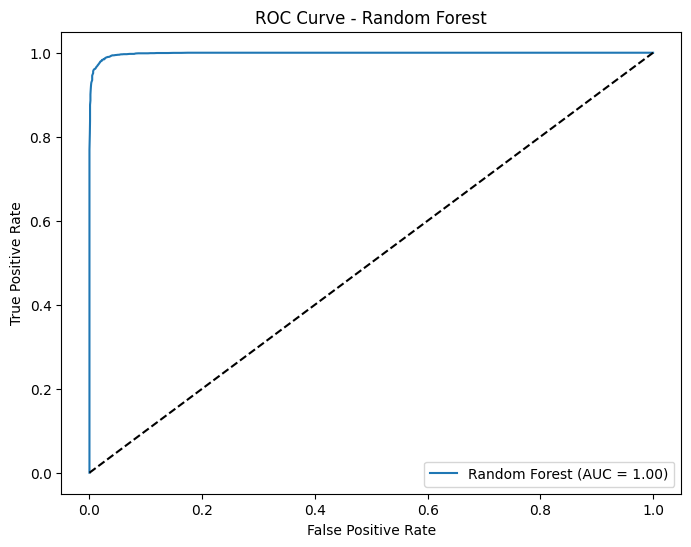

In [80]:
# 3. ROC Curve (for binary classification)
fpr, tpr, _ = roc_curve(y_test, forest_pred_proba, pos_label=classes[1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Random Forest')
plt.legend(loc='best')

In [81]:
# 3. ROC Curve (for binary classification)
fpr, tpr, _ = roc_curve(y_test, forest_pred_proba, pos_label=classes[1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - Random Forest')
plt.legend(loc='best')
plt.savefig(f'roc_curve_Random Forest.png', dpi=300, bbox_inches='tight')
plt.close()

### Hyperparameter Tuning for Random Forest

In [82]:
from sklearn.model_selection import RandomizedSearchCV

In [83]:
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [10,20,None],
    'min_samples_split': [2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2']
}

In [86]:
forest_model = RandomForestClassifier(random_state=42)

In [87]:
Random_search = RandomizedSearchCV(
    estimator=forest_model,param_distributions = param_grid,
    n_iter=10, cv=5,scoring='f1_weighted', random_state=42, n_jobs=-1
)

In [88]:
Random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, scoring='f1_weighted')

In [89]:
best_params = Random_search.best_params_

In [90]:
print("Best Hyperparameters: ", best_params)

Best Hyperparameters:  {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}


In [93]:
best_params_modified = best_params.copy()  # Copy the best parameters
best_params_modified['n_estimators'] = 10  # Override n_estimators
best_params_modified['random_state'] = 42  # Ensure random_state is set

In [95]:
forest_model_best = RandomForestClassifier(**best_params, random_state=42)

In [96]:
forest = forest_model_best.set_params(n_estimators=10, random_state=42)

In [97]:
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=10, random_state=42)

In [99]:
forest_pred = forest.predict(X_test)

In [100]:
print(classification_report(y_test, forest_pred, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2899
         1.0       0.97      0.98      0.98      2898

    accuracy                           0.98      5797
   macro avg       0.98      0.98      0.98      5797
weighted avg       0.98      0.98      0.98      5797



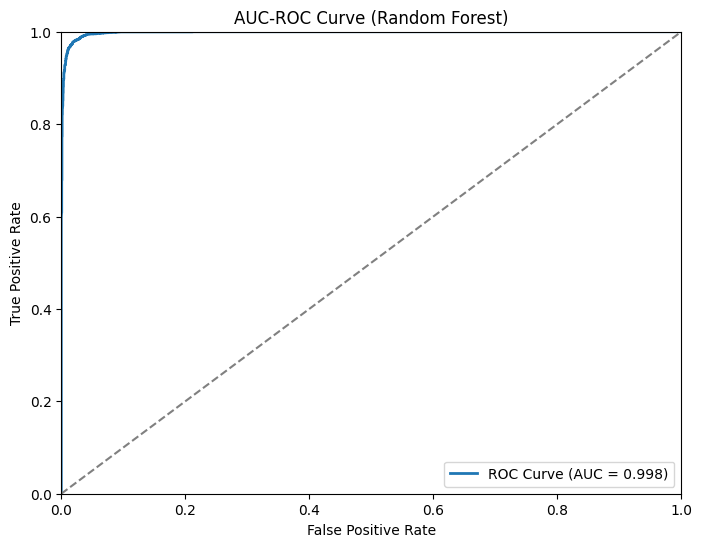

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = forest.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [101]:
forest_prob = forest.predict_proba(X_test)
classes = np.unique(y_train)

In [102]:
RF_HY_accuracy = accuracy_score(y_test, forest_pred)
RF_HY_precision = precision_score(y_test, forest_pred, average='weighted')
RF_HY_recall = recall_score(y_test, forest_pred, average='weighted')
RF_HY_f1 = f1_score(y_test, forest_pred, average='weighted')

In [104]:
y_test_bin = label_binarize(y_test, classes=classes).ravel()
print(f"Shape of y_test_bin: {y_test_bin.shape}")

Shape of y_test_bin: (5797,)


In [105]:
# ROC AUC Score for binary classification
fpr, tpr, _ = roc_curve(y_test_bin, forest_prob[:, 1])
RF_HY_roc_auc = auc(fpr, tpr)

In [106]:
# Print Metrics
print("Metrics for RandomForestClassifier:")
print(f"Accuracy: {RF_HY_accuracy:.4f}")
print(f"Precision: {RF_HY_precision:.4f}")
print(f"Recall: {RF_HY_recall:.4f}")
print(f"F1 Score: {RF_HY_f1:.4f}")
print(f"ROC AUC Score: {RF_HY_roc_auc:.4f}")

Metrics for RandomForestClassifier:
Accuracy: 0.9779
Precision: 0.9780
Recall: 0.9779
F1 Score: 0.9779
ROC AUC Score: 0.9974


In [107]:
# Confusion Matrix Data
cm = confusion_matrix(y_test, forest_pred)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# ROC Curve Data
fpr_dict = {1: fpr}
tpr_dict = {1: tpr}
roc_auc_dict = {1: RF_HY_roc_auc}

Text(45.722222222222214, 0.5, 'True Label')

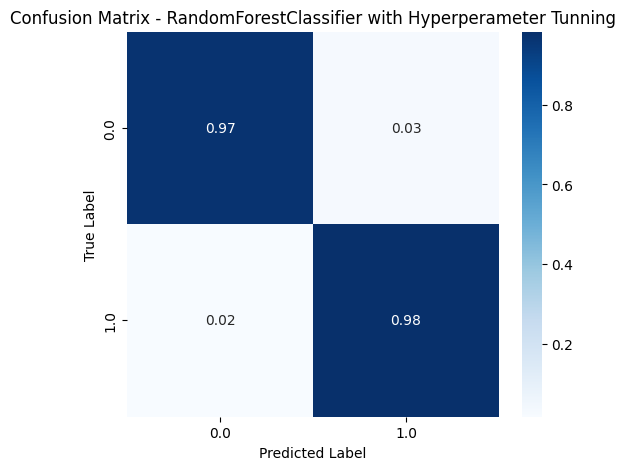

In [108]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - RandomForestClassifier with Hyperperameter Tunning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [109]:
# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix - RandomForestClassifier with Hyperperameter Tunning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.savefig('confusion_matrix_RandomForestClassifier_with_Hyperperameter_Tunning.png')
plt.close()

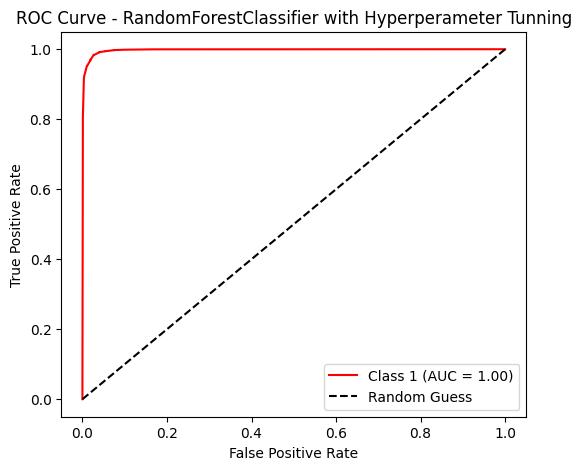

In [110]:
plt.figure(figsize=(6, 5))
plt.plot(fpr_dict[1], tpr_dict[1], label=f'Class 1 (AUC = {roc_auc_dict[1]:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForestClassifier with Hyperperameter Tunning')
plt.legend()

In [111]:
plt.figure(figsize=(6, 5))
plt.plot(fpr_dict[1], tpr_dict[1], label=f'Class 1 (AUC = {roc_auc_dict[1]:.2f})', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - RandomForestClassifier with Hyperperameter Tunning')
plt.legend()
plt.savefig('roc_curve_RandomForestClassifier_with_Hyperperameter_Tunning.png')
plt.close()

## Boosting Algorithms

In [112]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils.class_weight import compute_class_weight
from sklearn.multiclass import OneVsRestClassifier

In [113]:
model = AdaBoostClassifier(n_estimators=10, learning_rate=1)

In [114]:
model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=10)

In [115]:
y_pred_adaboost = model.predict(X_test)

In [116]:
print(classification_report(y_test,y_pred_adaboost,zero_division=0))

              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      2899
         1.0       0.82      0.82      0.82      2898

    accuracy                           0.82      5797
   macro avg       0.82      0.82      0.82      5797
weighted avg       0.82      0.82      0.82      5797



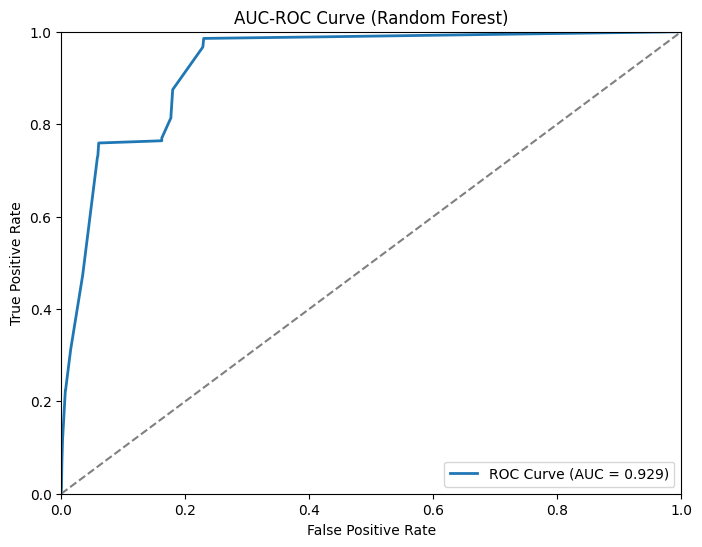

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = model.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
metrics = evaluate_multiclass(y_test, y_pred_adaboost, y_probs)
print(metrics)

{'Accuracy': 0.8190443332758324, 'Precision (Macro)': 0.8190646073267268, 'Recall (Macro)': 0.8190436434733568, 'F1 Score (Macro)': 0.8190412316063681, 'ROC AUC Score': np.float64(0.9289238739423961)}


<Axes: >

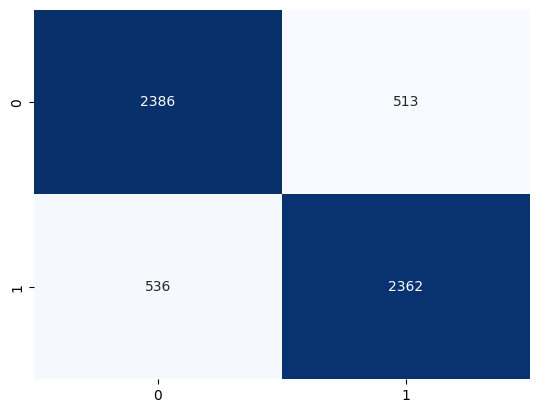

In [ ]:
cm = confusion_matrix(y_test, y_pred_adaboost)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

In [117]:
AdaBoost_accuracy = accuracy_score(y_test, y_pred_adaboost)
AdaBoost_precision = precision_score(y_test, y_pred_adaboost)
AdaBoost_recall = recall_score(y_test, y_pred_adaboost)
AdaBoost_f1 = f1_score(y_test, y_pred_adaboost)

In [118]:
y_prob_adaboost = model.predict_proba(X_test)[:, 1]  # Probability for class 1
AdaBoost_roc_auc = roc_auc_score(y_test, y_prob_adaboost)

In [119]:
# Print metrics
print("AdaBoostClassifier Metrics:")
print(f"Accuracy: {AdaBoost_accuracy:.4f}")
print(f"Precision: {AdaBoost_precision:.4f}")
print(f"Recall: {AdaBoost_recall:.4f}")
print(f"F1 Score: {AdaBoost_f1:.4f}")
print(f"ROC AUC Score: {AdaBoost_roc_auc:.4f}")

AdaBoostClassifier Metrics:
Accuracy: 0.8196
Precision: 0.8198
Recall: 0.8192
F1 Score: 0.8195
ROC AUC Score: 0.9263


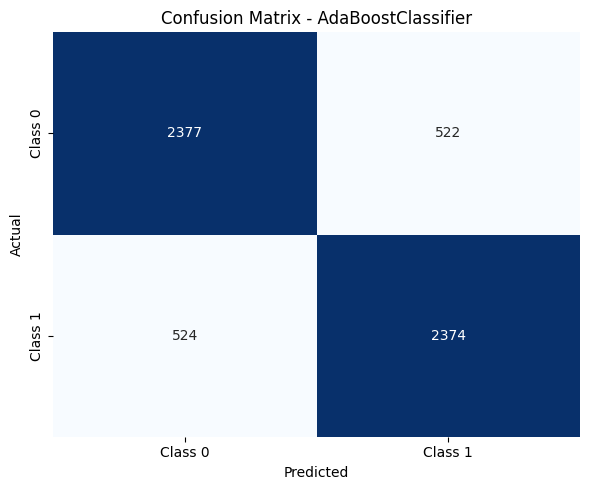

In [121]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - AdaBoostClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

In [122]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - AdaBoostClassifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('adaboost_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.close()

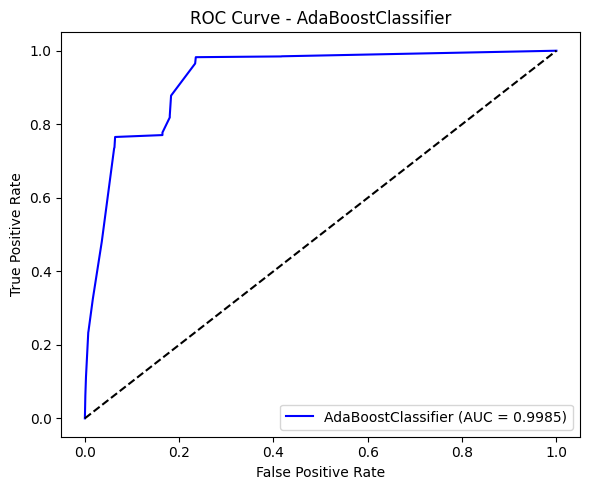

In [125]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_adaboost)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AdaBoostClassifier (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoostClassifier')
plt.legend(loc='lower right')
plt.tight_layout()

In [126]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_adaboost)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'AdaBoostClassifier (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - AdaBoostClassifier')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('adaboost_roc_curve.png', dpi=300, bbox_inches='tight')
plt.close()

Hyperparameter Tuning

In [127]:
param_grid = {
    'n_estimators': [50,100,200,500],
    'learning_rate': [0.01,0.1,0.5,1],
    'estimator': [DecisionTreeClassifier(max_depth=1),
                  DecisionTreeClassifier(max_depth=3)]
}

In [128]:
ada_model = AdaBoostClassifier(random_state=42)

In [129]:
random_search = RandomizedSearchCV(
    estimator=ada_model,param_distributions=param_grid,
    n_iter=10,cv=5,scoring='f1_weighted', random_state=42, n_jobs=-1
)

In [130]:
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
                   n_jobs=-1,
                   param_distributions={'estimator': [DecisionTreeClassifier(max_depth=1),
                                                      DecisionTreeClassifier(max_depth=3)],
                                        'learning_rate': [0.01, 0.1, 0.5, 1],
                                        'n_estimators': [50, 100, 200, 500]},
                   random_state=42, scoring='f1_weighted')

In [131]:
best_params = random_search.best_params_
print("Best Hyperparameters :", best_params)

Best Hyperparameters : {'n_estimators': 200, 'learning_rate': 1, 'estimator': DecisionTreeClassifier(max_depth=3)}


In [132]:
model_best = AdaBoostClassifier(**best_params,random_state=42)
model_best.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=1, n_estimators=200, random_state=42)

In [133]:
y_pred_adaboost = model_best.predict(X_test)

In [ ]:
print(classification_report(y_test,y_pred_adaboost, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.98      0.96      0.97      2899
         1.0       0.96      0.98      0.97      2898

    accuracy                           0.97      5797
   macro avg       0.97      0.97      0.97      5797
weighted avg       0.97      0.97      0.97      5797



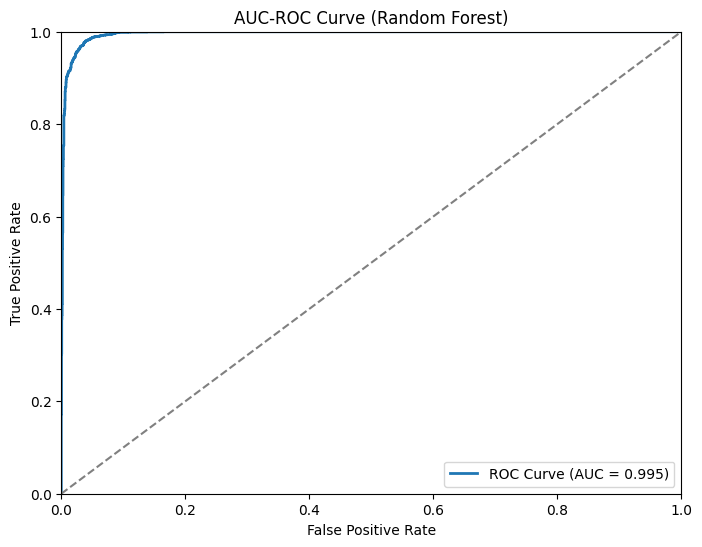

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = model_best.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [134]:
# Calculate metrics
AdaBoost_HY_accuracy = accuracy_score(y_test, y_pred_adaboost)
AdaBoost_HY_precision = precision_score(y_test, y_pred_adaboost, pos_label=1)
AdaBoost_HY_recall = recall_score(y_test, y_pred_adaboost, pos_label=1)
AdaBoost_HY_f1 = f1_score(y_test, y_pred_adaboost, pos_label=1)
AdaBoost_HY_roc_auc = roc_auc_score(y_test, model_best.predict_proba(X_test)[:, 1])

In [135]:
# Print metrics
print("AdaBoost Model Metrics:")
print(f"Accuracy: {AdaBoost_HY_accuracy:.4f}")
print(f"Precision: {AdaBoost_HY_precision:.4f}")
print(f"Recall: {AdaBoost_HY_recall:.4f}")
print(f"F1 Score: {AdaBoost_HY_f1:.4f}")
print(f"ROC AUC Score: {AdaBoost_HY_roc_auc:.4f}")

AdaBoost Model Metrics:
Accuracy: 0.9702
Precision: 0.9595
Recall: 0.9817
F1 Score: 0.9705
ROC AUC Score: 0.9955


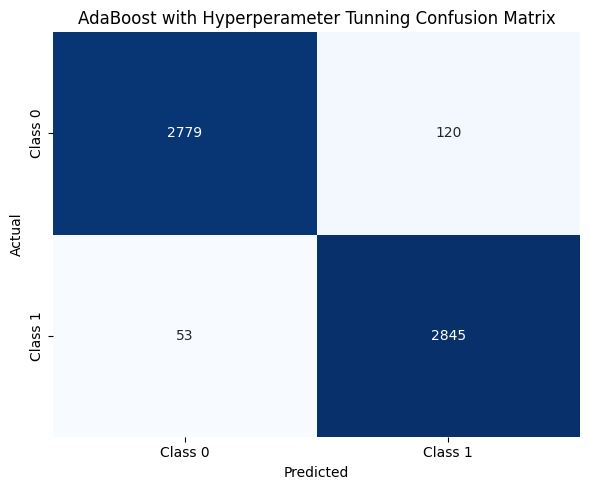

In [136]:
# 1. Confusion Matrix Graph
cm = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('AdaBoost with Hyperperameter Tunning Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

In [137]:
# 1. Confusion Matrix Graph
cm = confusion_matrix(y_test, y_pred_adaboost)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('AdaBoost with Hyperperameter Tunning Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('adaboost_with_Hyperperameter_Tunning_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.close()

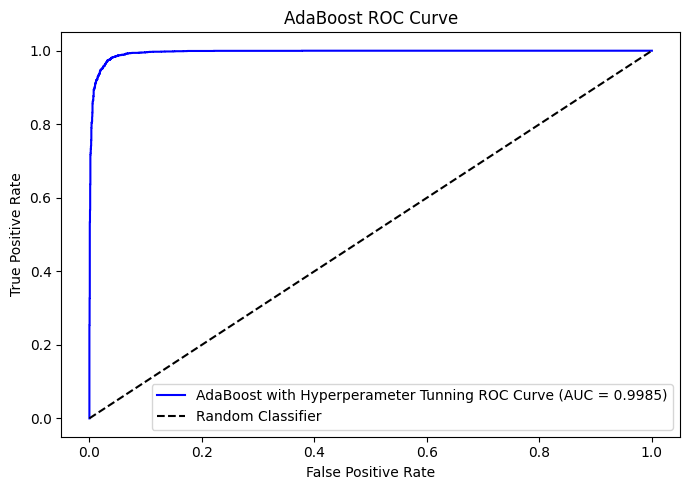

In [139]:
fpr, tpr, _ = roc_curve(y_test, model_best.predict_proba(X_test)[:, 1], pos_label=1)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AdaBoost with Hyperperameter Tunning ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()

In [140]:
fpr, tpr, _ = roc_curve(y_test, model_best.predict_proba(X_test)[:, 1], pos_label=1)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'AdaBoost with Hyperperameter Tunning ROC Curve (AUC = {roc_auc:.4f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('AdaBoost_with_Hyperperameter_Tunning_roc_curve.png', dpi=300, bbox_inches='tight')
plt.close()

### **SVC**

In [141]:
from sklearn.svm import SVC

In [142]:
svc = SVC(probability=True, kernel='linear')

In [143]:
svc.fit(X_train, y_train)

SVC(kernel='linear', probability=True)

In [144]:
y_pred_svc = svc.predict(X_test)

In [145]:
print("Accuracy: ", accuracy_score(y_test,y_pred_svc))

Accuracy:  0.8276694842159737


In [147]:
print(classification_report(y_test, y_pred_svc, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      2899
         1.0       0.83      0.82      0.83      2898

    accuracy                           0.83      5797
   macro avg       0.83      0.83      0.83      5797
weighted avg       0.83      0.83      0.83      5797



In [150]:
metrics = evaluate_multiclass(y_test, y_pred_svc, y_probs)
print(metrics)

{'Accuracy': 0.8276694842159737, 'Precision (Macro)': 0.8276837351900184, 'Recall (Macro)': 0.8276689136993289, 'F1 Score (Macro)': 0.827667432955801, 'ROC AUC Score': np.float64(0.9097935058161223)}


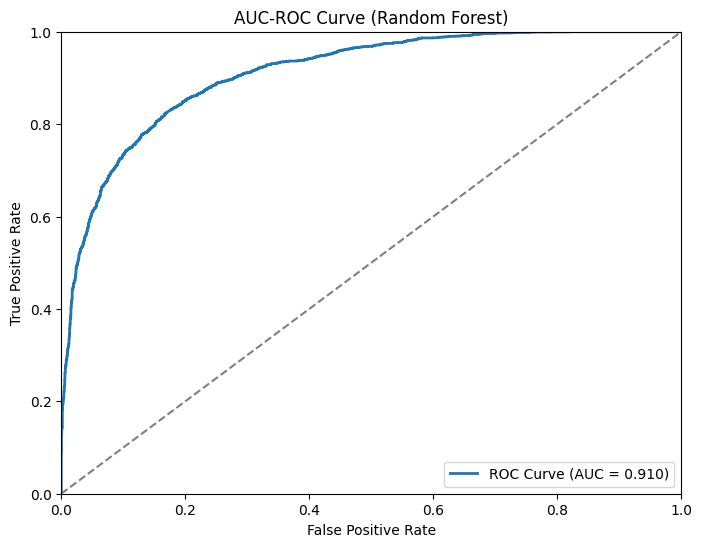

In [149]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = svc.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [151]:
y_prob_svc = svc.predict_proba(X_test)[:, 1]

In [152]:
SVC_accuracy = accuracy_score(y_test, y_pred_svc)
SVC_precision = precision_score(y_test, y_pred_svc, pos_label=1)
SVC_recall = recall_score(y_test, y_pred_svc, pos_label=1)
SVC_f1 = f1_score(y_test, y_pred_svc, pos_label=1)

fpr, tpr, _ = roc_curve(y_test, y_prob_svc, pos_label=1)
SVC_roc_auc = auc(fpr, tpr)

In [153]:
# Print metrics
print("SVM Model Metrics:")
print(f"Accuracy: {SVC_accuracy:.4f}")
print(f"Precision: {SVC_precision:.4f}")
print(f"Recall: {SVC_recall:.4f}")
print(f"F1 Score: {SVC_f1:.4f}")
print(f"ROC AUC Score: {SVC_roc_auc:.4f}")

SVM Model Metrics:
Accuracy: 0.8277
Precision: 0.8298
Recall: 0.8244
F1 Score: 0.8271
ROC AUC Score: 0.9098


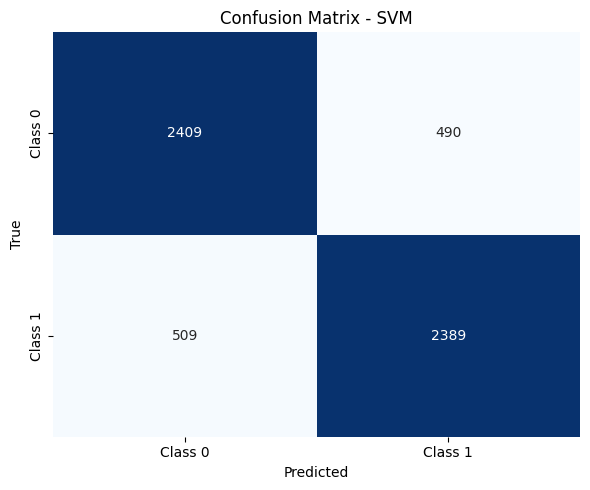

In [154]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()

In [155]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_svc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_svm.png', dpi=300)
plt.close()

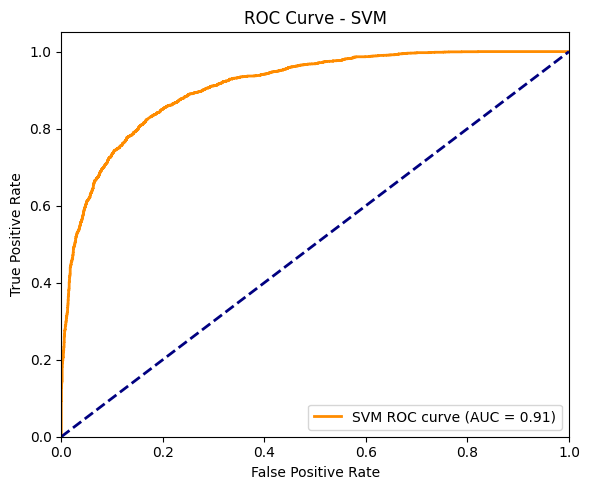

In [156]:
# ROC Curve Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.tight_layout()

In [157]:
# ROC Curve Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve_svm.png', dpi=300)
plt.close()

### Hypertune the SVC

In [158]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient (for rbf kernel)
}

In [159]:
svc = SVC(probability=True)

In [160]:
# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=svc,
    param_grid=param_grid,
    scoring='f1',  # Optimize for F1 score (you can change to 'accuracy', 'precision', 'recall', or 'roc_auc')
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1
)

In [161]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf']},
             scoring='f1', verbose=1)

In [162]:
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation F1 Score:", grid_search.best_score_)

Best Parameters: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation F1 Score: 0.9828484720506193


In [163]:
best_svc = grid_search.best_estimator_
y_pred_best = best_svc.predict(X_test)
y_prob_best = best_svc.predict_proba(X_test)[:, 1]

In [164]:
# Calculate metrics
SVC_HY_accuracy = accuracy_score(y_test, y_pred_best)
SVC_HY_precision = precision_score(y_test, y_pred_best, pos_label=1)
SVC_HY_recall = recall_score(y_test, y_pred_best, pos_label=1)
SVC_HY_f1 = f1_score(y_test, y_pred_best, pos_label=1)
SVC_HY_roc_auc = roc_auc_score(y_test, y_prob_best)

In [165]:
print("\nBest SVC Model Metrics on Test Set:")
print(f"Accuracy: {SVC_HY_accuracy:.4f}")
print(f"Precision: {SVC_HY_precision:.4f}")
print(f"Recall: {SVC_HY_recall:.4f}")
print(f"F1 Score: {SVC_HY_f1:.4f}")
print(f"ROC AUC Score: {SVC_HY_roc_auc:.4f}")


Best SVC Model Metrics on Test Set:
Accuracy: 0.9821
Precision: 0.9707
Recall: 0.9941
F1 Score: 0.9823
ROC AUC Score: 0.9925


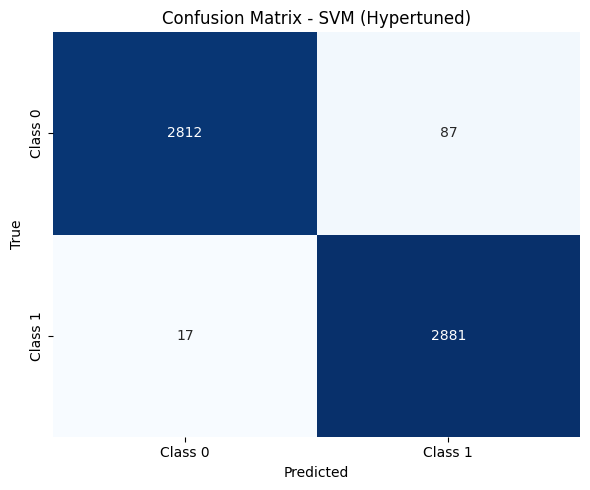

In [166]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - SVM (Hypertuned)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()

In [167]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - SVM (Hypertuned)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_svm_hypertuned.png', dpi=300)
plt.close()

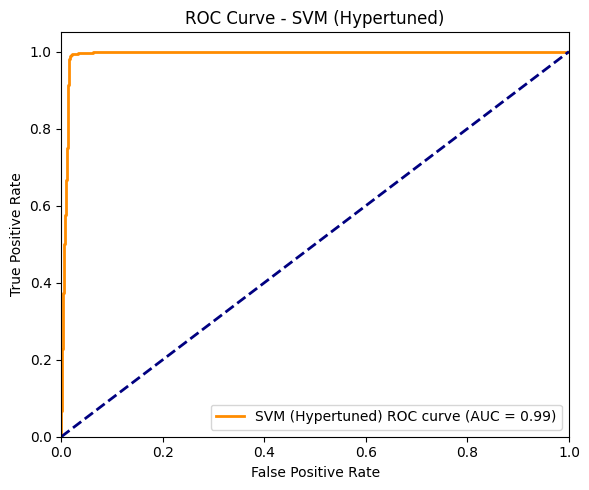

In [168]:
# ROC Curve Plot
plt.figure(figsize=(6, 5))
fpr, tpr, _ = roc_curve(y_test, y_prob_best, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM (Hypertuned) ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Hypertuned)')
plt.legend(loc="lower right")
plt.tight_layout()

In [169]:
# ROC Curve Plot
plt.figure(figsize=(6, 5))
fpr, tpr, _ = roc_curve(y_test, y_prob_best, pos_label=1)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'SVM (Hypertuned) ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Hypertuned)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve_svm_hypertuned.png', dpi=300)
plt.close()

Gradient Boosting

In [170]:
from sklearn.ensemble import GradientBoostingClassifier

In [171]:
gbc = GradientBoostingClassifier(n_estimators=10, learning_rate=0.1, max_depth=5, random_state=101)

In [172]:
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=10, random_state=101)

In [173]:
y_pred_gbc = gbc.predict(X_test)

In [174]:
print(classification_report(y_test, y_pred_gbc, zero_division=0))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.95      2899
         1.0       0.94      0.96      0.95      2898

    accuracy                           0.95      5797
   macro avg       0.95      0.95      0.95      5797
weighted avg       0.95      0.95      0.95      5797



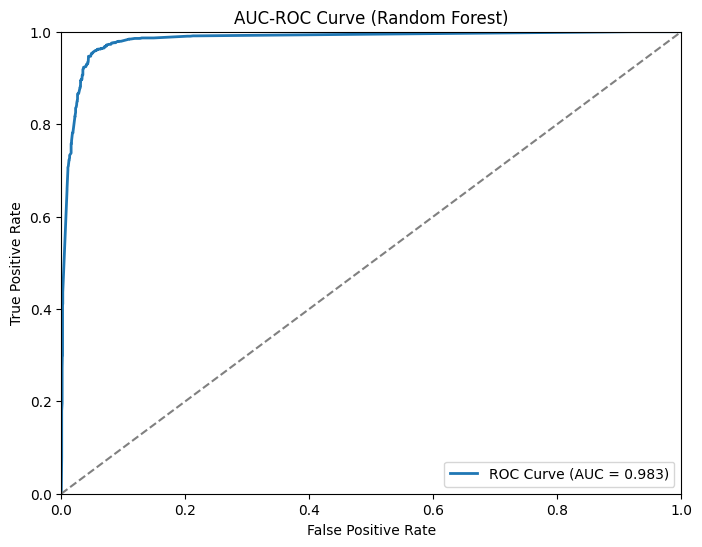

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = gbc.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

In [ ]:
metrics = evaluate_multiclass(y_test, y_pred_gbc, y_probs)
print(metrics)

{'Accuracy': 0.9480765913403485, 'Precision (Macro)': 0.948830309302442, 'Recall (Macro)': 0.9480801309130418, 'F1 Score (Macro)': 0.948055068450046, 'ROC AUC Score': np.float64(0.9829439532110616)}


<Axes: >

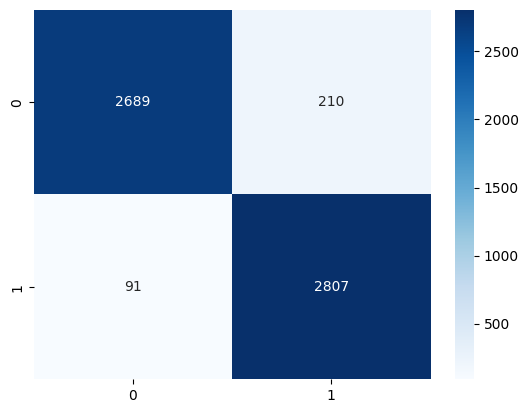

In [ ]:
cm = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [175]:
# Calculate metrics
GBC_accuracy = accuracy_score(y_test, y_pred_gbc)
GBC_precision = precision_score(y_test, y_pred_gbc, pos_label=1)
GBC_recall = recall_score(y_test, y_pred_gbc, pos_label=1)
GBC_f1 = f1_score(y_test, y_pred_gbc, pos_label=1)
GBC_roc_auc = roc_auc_score(y_test, gbc.predict_proba(X_test)[:, 1])

In [176]:
model_name = "Gradient Boosting Classifier"

In [177]:
print(f"{model_name} Metrics:")
print(f"Accuracy: {GBC_accuracy:.4f}")
print(f"Precision: {GBC_precision:.4f}")
print(f"Recall: {GBC_recall:.4f}")
print(f"F1 Score: {GBC_f1:.4f}")
print(f"ROC AUC Score: {GBC_roc_auc:.4f}")

Gradient Boosting Classifier Metrics:
Accuracy: 0.9482
Precision: 0.9365
Recall: 0.9617
F1 Score: 0.9489
ROC AUC Score: 0.9846


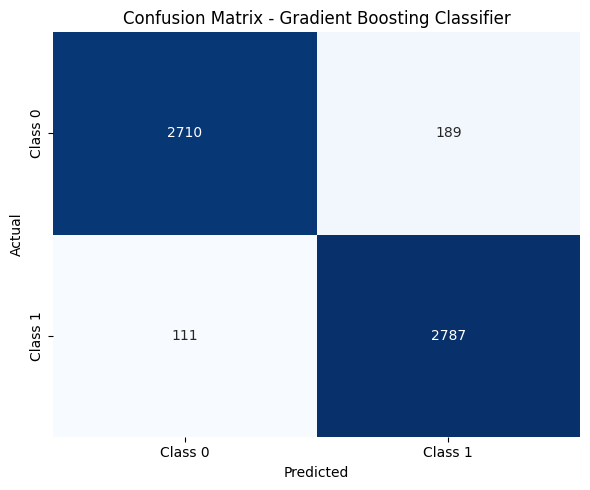

In [178]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

In [179]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('gbc_confusion_matrix.png', dpi=300)
plt.close()

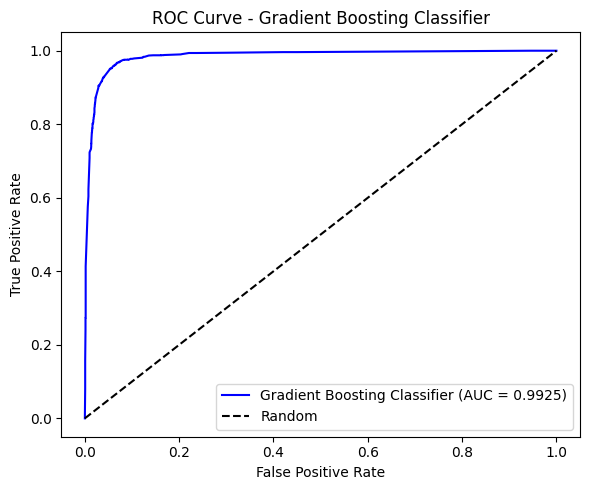

In [180]:
# ROC Curve Plot
plt.figure(figsize=(6, 5))
fpr, tpr, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.tight_layout()

In [181]:
# ROC Curve Plot
plt.figure(figsize=(6, 5))
fpr, tpr, _ = roc_curve(y_test, gbc.predict_proba(X_test)[:, 1], pos_label=1)
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('gbc_roc_curve.png', dpi=300)
plt.close()

### Hyperparameter Tuning

In [182]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [183]:
gbc = GradientBoostingClassifier(random_state=101)

In [184]:
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid,
                           cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

In [185]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [50, 100, 200]},
             scoring='roc_auc', verbose=1)

In [186]:
# Get the best model and parameters
best_gbc = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best ROC AUC Score from Grid Search:", grid_search.best_score_)

Best Parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC AUC Score from Grid Search: 0.9990344708449774


In [187]:
# Predict with the best model
y_pred_gbc = best_gbc.predict(X_test)
y_proba_gbc = best_gbc.predict_proba(X_test)[:, 1]

In [188]:
# Model name for labeling
model_name = "Gradient Boosting Classifier with Hyperperameter Tunning"

In [189]:
# Calculate metrics
GBC_HY_accuracy = accuracy_score(y_test, y_pred_gbc)
GBC_HY_precision = precision_score(y_test, y_pred_gbc, pos_label=1)
GBC_HY_recall = recall_score(y_test, y_pred_gbc, pos_label=1)
GBC_HY_f1 = f1_score(y_test, y_pred_gbc, pos_label=1)
GBC_HY_roc_auc = roc_auc_score(y_test, y_proba_gbc)

In [190]:
# Print metrics
print(f"\n{model_name} Metrics:")
print(f"Accuracy: {GBC_HY_accuracy:.4f}")
print(f"Precision: {GBC_HY_precision:.4f}")
print(f"Recall: {GBC_HY_recall:.4f}")
print(f"F1 Score: {GBC_HY_f1:.4f}")
print(f"ROC AUC Score: {GBC_HY_roc_auc:.4f}")


Gradient Boosting Classifier with Hyperperameter Tunning Metrics:
Accuracy: 0.9869
Precision: 0.9829
Recall: 0.9910
F1 Score: 0.9869
ROC AUC Score: 0.9990


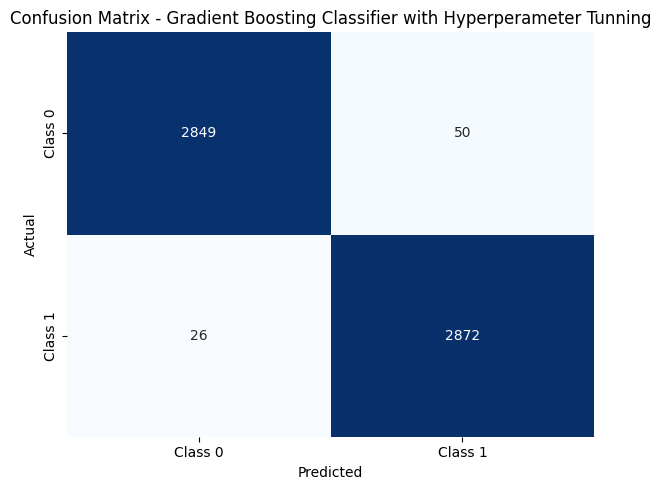

In [191]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

In [192]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred_gbc)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('tuned_gbc_confusion_matrix.png', dpi=300)
plt.close()

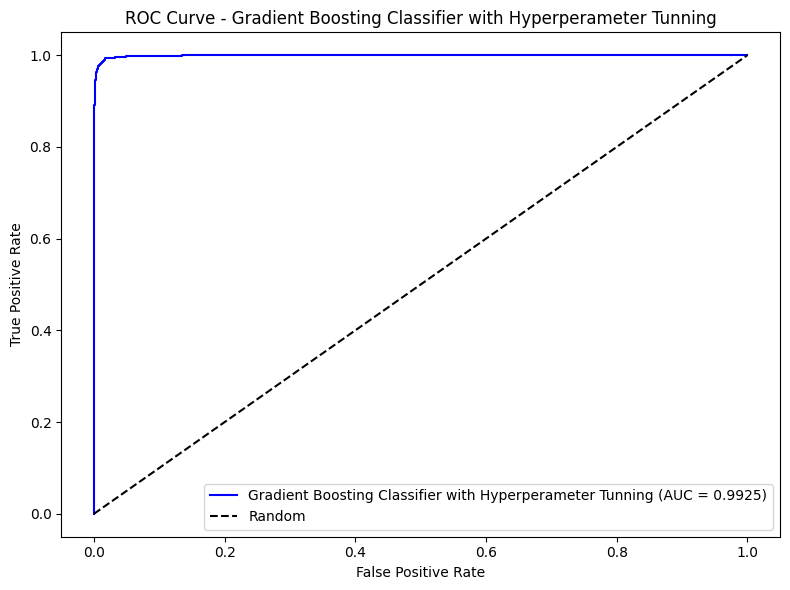

In [195]:
# ROC Curve Plot
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba_gbc, pos_label=1)
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.tight_layout()

In [196]:
# ROC Curve Plot
plt.figure(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_proba_gbc, pos_label=1)
plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.4f})', color='b')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('tuned_gbc_roc_curve.png', dpi=300)
plt.close()

### **XGB Classifier**

In [197]:
from xgboost import XGBClassifier

In [198]:
xgb = XGBClassifier(random_state=42, scale_pos_weight=sum(y_train==0)/sum(y_train==1))

In [199]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [200]:
xgb_pred = xgb.predict(X_test)

In [201]:
print("XGBoost Report:\n", classification_report(y_test, xgb_pred))

XGBoost Report:
               precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2899
         1.0       0.98      0.99      0.98      2898

    accuracy                           0.98      5797
   macro avg       0.98      0.98      0.98      5797
weighted avg       0.98      0.98      0.98      5797



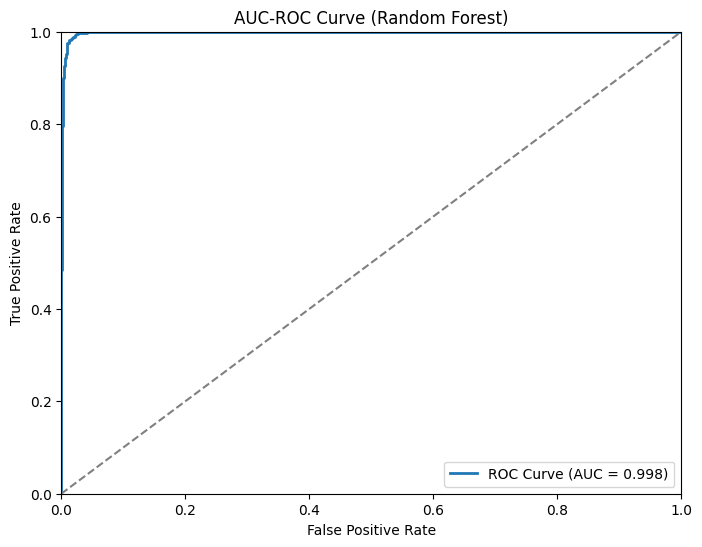

In [ ]:
y_test_bin = label_binarize(y_test, classes=np.unique(y_test)).ravel()
y_probs = xgb.predict_proba(X_test)

fpr, tpr, _ = roc_curve(y_test_bin, y_probs[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, lw=2, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curve (Random Forest)')
plt.legend(loc='lower right')
plt.show()

<Axes: >

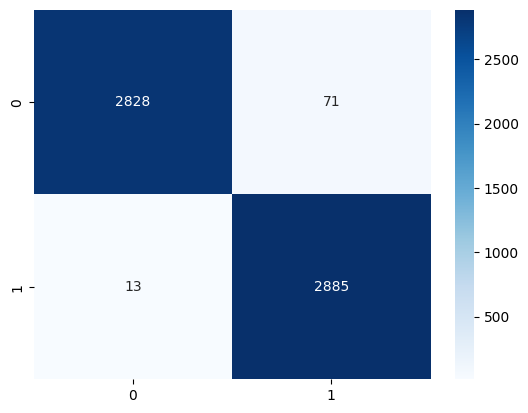

In [ ]:
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

In [ ]:
metrics = evaluate_multiclass(y_test, xgb_pred, y_probs)
print(metrics)

{'Accuracy': 0.9855097464205623, 'Precision (Macro)': 0.9857026009538467, 'Recall (Macro)': 0.9855114719123297, 'F1 Score (Macro)': 0.9855083453465214, 'ROC AUC Score': np.float64(0.9983689432899805)}


In [202]:
XGB_accuracy = accuracy_score(y_test, xgb_pred)
XGB_precision = precision_score(y_test, xgb_pred)
XGB_recall = recall_score(y_test, xgb_pred)
XGB_f1 = f1_score(y_test, xgb_pred)

In [203]:
y_prob = xgb.predict_proba(X_test)[:, 1]  # Probability scores for the positive class (1)
fpr, tpr, _ = roc_curve(y_test, y_prob)
XGB_roc_auc = auc(fpr, tpr)

In [204]:
# Print metrics
print("XGBoost Model Metrics:")
print(f"Accuracy: {XGB_accuracy:.4f}")
print(f"Precision: {XGB_precision:.4f}")
print(f"Recall: {XGB_recall:.4f}")
print(f"F1 Score: {XGB_f1:.4f}")
print(f"ROC AUC Score: {XGB_roc_auc:.4f}")

XGBoost Model Metrics:
Accuracy: 0.9845
Precision: 0.9779
Recall: 0.9914
F1 Score: 0.9846
ROC AUC Score: 0.9988


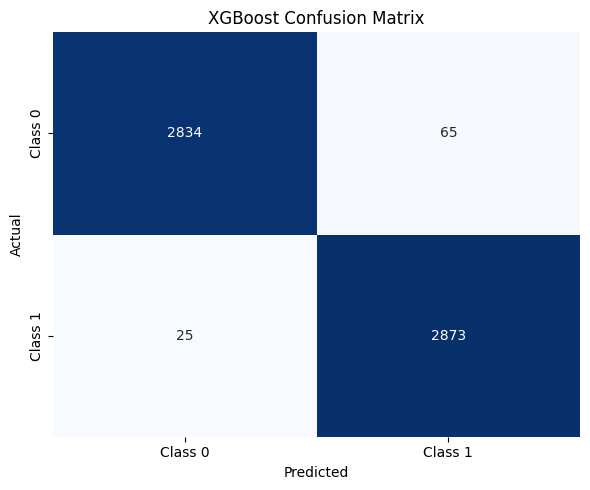

In [205]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

In [206]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('xgboost_confusion_matrix.png', dpi=300)
plt.close()

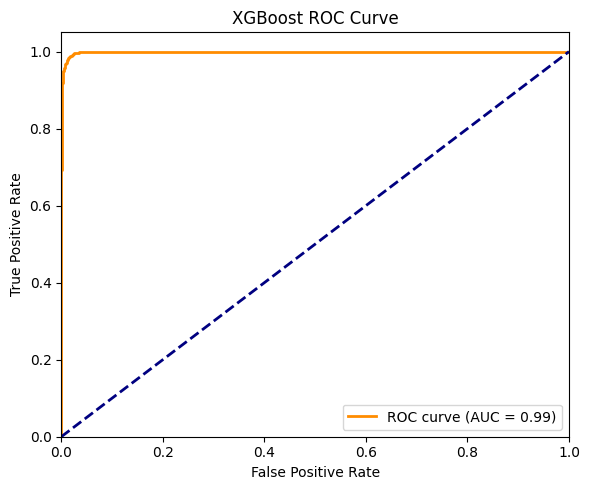

In [207]:
# ROC Curve Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()

In [208]:
# ROC Curve Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('xgboost_roc_curve.png', dpi=300)
plt.close()

### Hyperparameter tuning for XGBoost classifier

In [209]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [210]:
# Initialize XGBoost classifier with scale_pos_weight
scale_pos_weight = sum(y_train == 0) / sum(y_train == 1)
xgb = XGBClassifier(random_state=42, scale_pos_weight=scale_pos_weight)

In [211]:
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',  # Optimize for ROC AUC; change to 'f1', 'precision', etc., if needed
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    verbose=1
)

In [212]:
# Fit grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='roc_auc', verbose=1)

In [213]:
# Get the best model
best_xgb = grid_search.best_estimator_
print("Best Hyperparameters:", grid_search.best_params_)
print("Best ROC AUC Score (CV):", grid_search.best_score_)

Best Hyperparameters: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best ROC AUC Score (CV): 0.9987416195436832


In [214]:
# Make predictions with the best model
xgb_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1]

In [215]:
XGB_HY_accuracy = accuracy_score(y_test, xgb_pred)
XGB_HY_precision = precision_score(y_test, xgb_pred)
XGB_HY_recall = recall_score(y_test, xgb_pred)
XGB_HY_f1 = f1_score(y_test, xgb_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
XGB_HY_roc_auc = auc(fpr, tpr)

In [216]:
# Print metrics
print("\nTuned XGBoost Model Metrics:")
print(f"Accuracy: {XGB_HY_accuracy:.4f}")
print(f"Precision: {XGB_HY_precision:.4f}")
print(f"Recall: {XGB_HY_recall:.4f}")
print(f"F1 Score: {XGB_HY_f1:.4f}")
print(f"ROC AUC Score: {XGB_HY_roc_auc:.4f}")


Tuned XGBoost Model Metrics:
Accuracy: 0.9860
Precision: 0.9802
Recall: 0.9921
F1 Score: 0.9861
ROC AUC Score: 0.9991


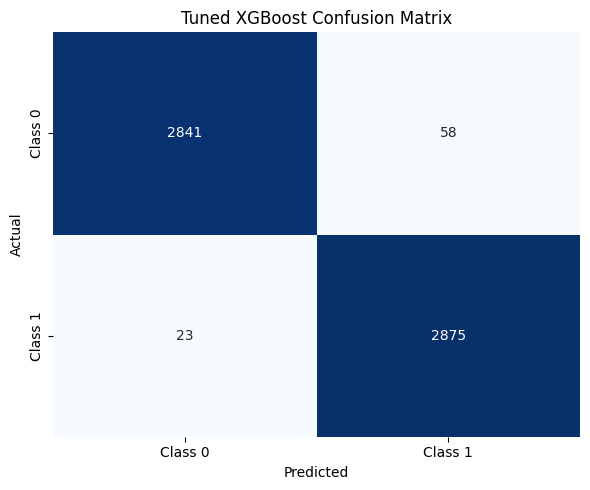

In [217]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Tuned XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()

In [218]:
# Confusion Matrix Plot
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Tuned XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('tuned_xgboost_confusion_matrix.png', dpi=300)
plt.close()

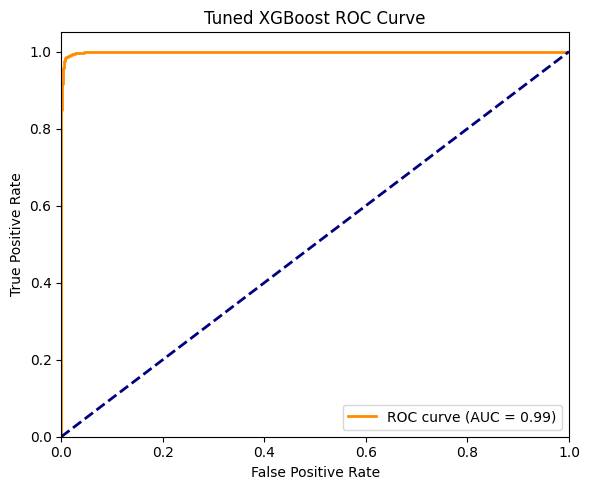

In [219]:
# ROC Curve Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()

In [220]:
# ROC Curve Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned XGBoost ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('tuned_xgboost_roc_curve.png', dpi=300)
plt.close()

### **Neural Network (ANN)**

In [223]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

In [221]:

X_train.shape

(13525, 6)

In [224]:
Early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [230]:
model = Sequential()

In [231]:
model.add(Input(shape=(6, )))

In [232]:
model.add(Dense(30, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(12, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))


model.add(Dense(2, activation='sigmoid'))

In [233]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [234]:
model.fit(x=X_train, y=y_train,
          validation_data=(X_test, y_test),
          batch_size=128, epochs=600, callbacks=[Early_stop])

Epoch 1/600
106/106 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.5186 - loss: 1.0435 - val_accuracy: 0.6790 - val_loss: 0.6552
Epoch 2/600
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5568 - loss: 0.8022 - val_accuracy: 0.7047 - val_loss: 0.6387
Epoch 3/600
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5927 - loss: 0.7194 - val_accuracy: 0.7288 - val_loss: 0.5887
Epoch 4/600
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6292 - loss: 0.6572 - val_accuracy: 0.7837 - val_loss: 0.5328
Epoch 5/600
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6646 - loss: 0.6251 - val_accuracy: 0.8441 - val_loss: 0.4661
Epoch 6/600
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6925 - loss: 0.5971 - val_accuracy: 0.8603 - val_loss: 0.4189
Epoch 7/600
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7280 - loss: 0.5579 - val_accuracy: 0.8639 - val_loss: 0.3818
Epoch 8/600
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7447 - loss: 0.5378 - val_accu

In [235]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

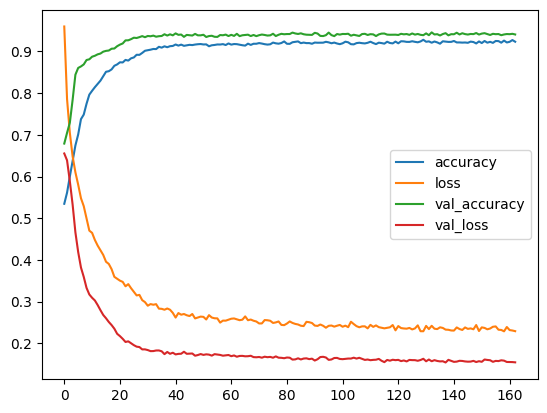

In [236]:
model_loss.plot()

In [237]:
predict = model.predict(X_test)

182/182 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [238]:
predict[0]

array([0.4651854 , 0.00424638], dtype=float32)

In [239]:
np.argmax(predict[0])

np.int64(0)

In [240]:
predict_label = [np.argmax(i) for i in predict]

In [241]:
print(classification_report(y_test, predict_label))

              precision    recall  f1-score   support

         0.0       0.97      0.91      0.94      2899
         1.0       0.91      0.97      0.94      2898

    accuracy                           0.94      5797
   macro avg       0.94      0.94      0.94      5797
weighted avg       0.94      0.94      0.94      5797



In [242]:
model_name = "Neural Network"  # Specify the model name
y_pred_prob = model.predict(X_test)  # Probability outputs
y_pred = np.argmax(y_pred_prob, axis=1)  # Predicted class labels (0 or 1)

182/182 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [243]:
# Calculate metrics
ANN_accuracy = accuracy_score(y_test, y_pred)
ANN_precision = precision_score(y_test, y_pred)
ANN_recall = recall_score(y_test, y_pred)
ANN_f1 = f1_score(y_test, y_pred)
ANN_roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])

In [244]:
# Print metrics
print(f"Model: {model_name}")
print(f"Accuracy: {ANN_accuracy:.4f}")
print(f"Precision: {ANN_precision:.4f}")
print(f"Recall: {ANN_recall:.4f}")
print(f"F1 Score: {ANN_f1:.4f}")
print(f"ROC AUC Score: {ANN_roc_auc:.4f}")

Model: Neural Network
Accuracy: 0.9405
Precision: 0.9143
Recall: 0.9720
F1 Score: 0.9423
ROC AUC Score: 0.9852


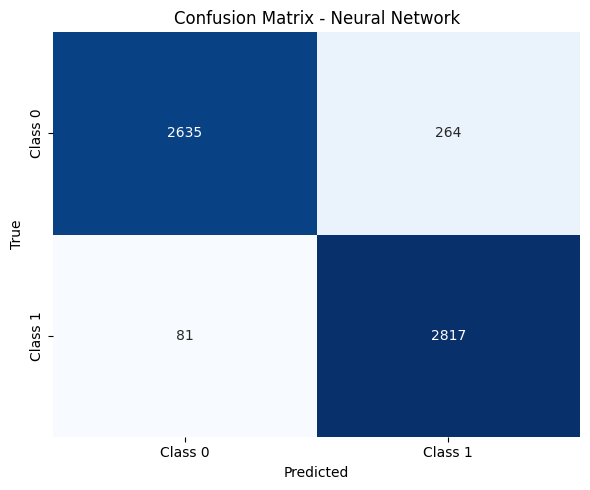

In [245]:
# 1. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()

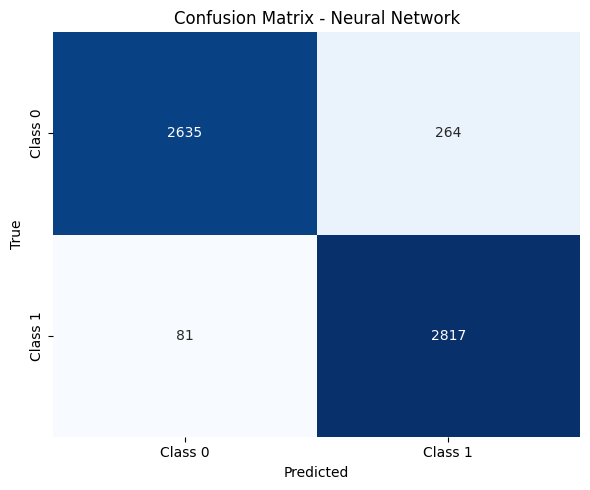

In [246]:
# 1. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title(f'Confusion Matrix - {model_name}')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('confusion_matrix_neural_network.png', dpi=300)  # Save the plot
plt.show()

In [247]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])  # False Positive Rate, True Positive Rate
roc_auc_value = auc(fpr, tpr)

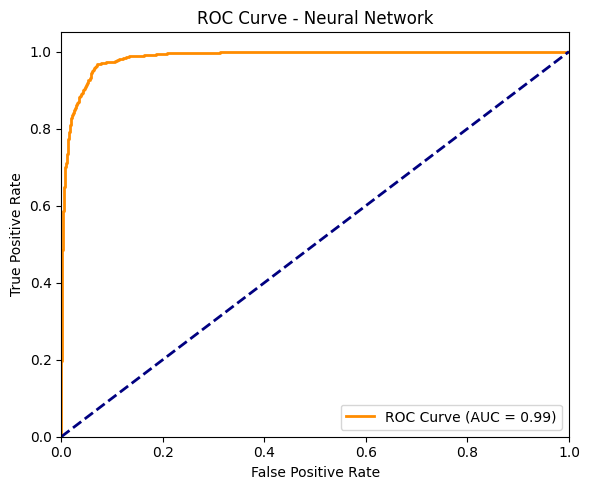

In [248]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc="lower right")
plt.tight_layout()

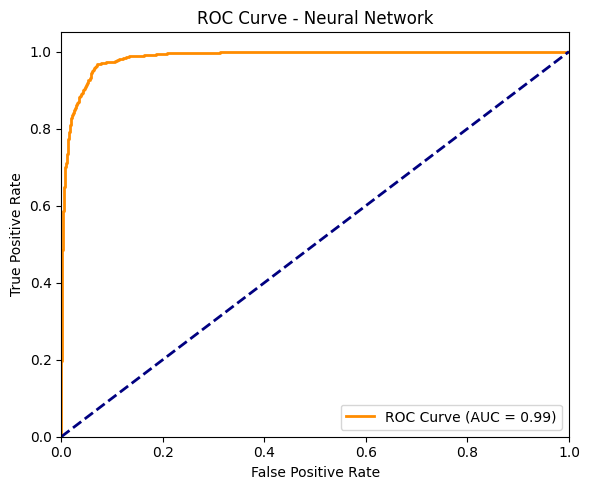

In [249]:
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {model_name}')
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig('roc_curve_neural_network.png', dpi=300)  # Save the plot
plt.show()